In [27]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
disease_df = pd.read_csv('disease_prediction.csv')
testing_df = pd.read_csv('disease_classificationTest.csv')

In [30]:
print(disease_df.shape)
print(testing_df.shape)

(4920, 134)
(42, 133)


In [31]:
disease_df.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [32]:
disease_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [33]:
disease_df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN


# PRE PROCESSING

In [34]:
disease_df.drop(columns = 'Unnamed: 133', inplace=True)

In [35]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [36]:
disease_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [37]:
diseases = disease_df['prognosis'].unique()

In [38]:
print(diseases)

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


# DATA VISUALIZATION

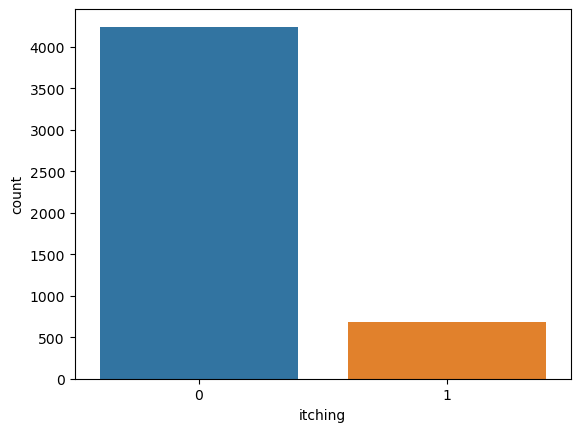

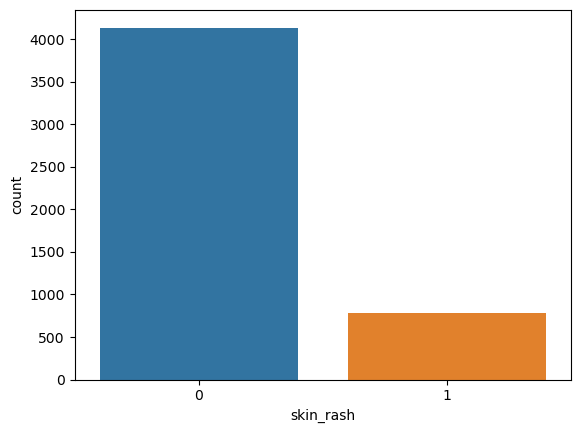

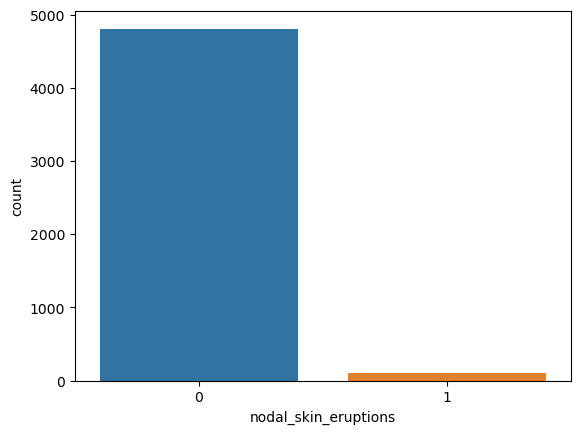

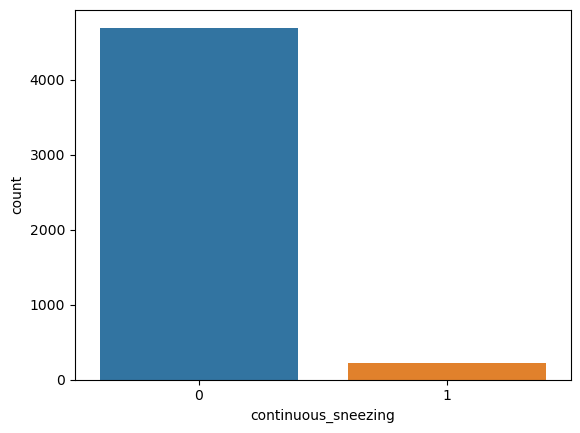

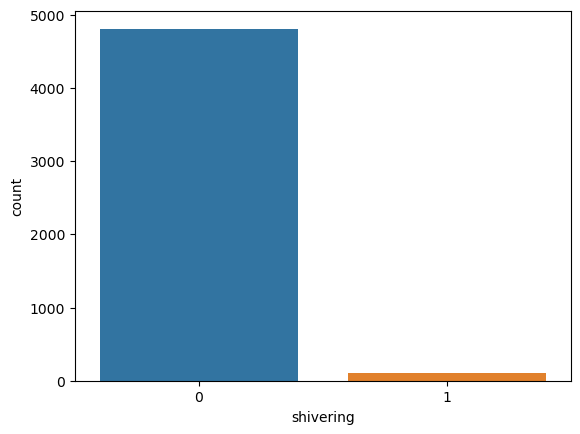

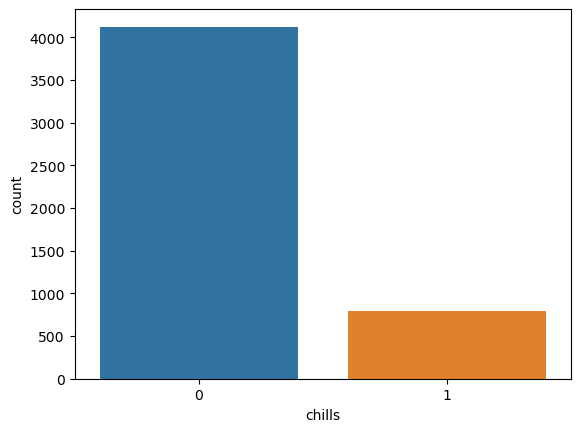

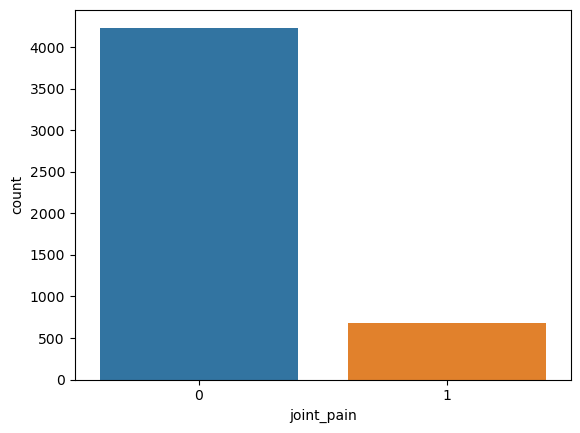

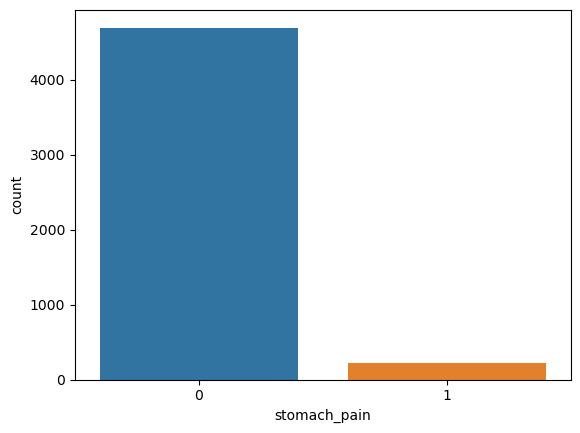

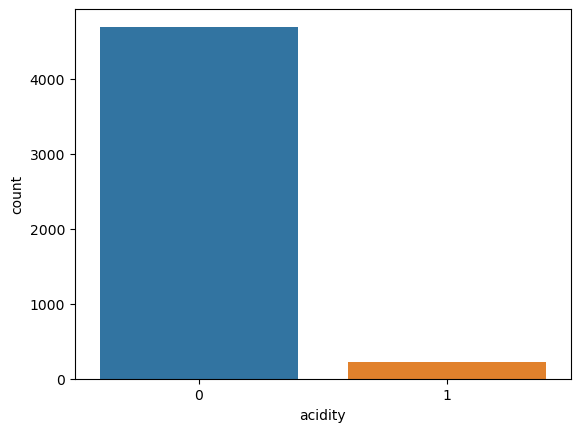

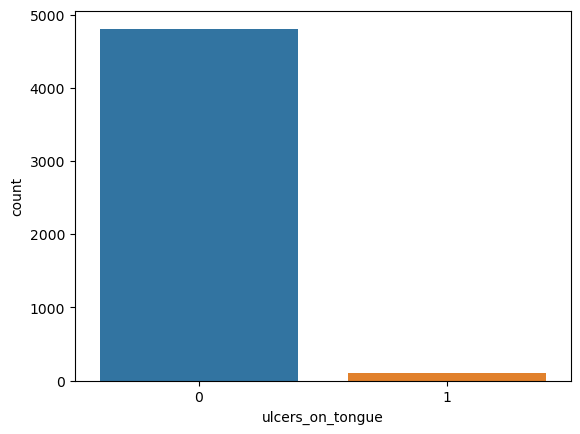

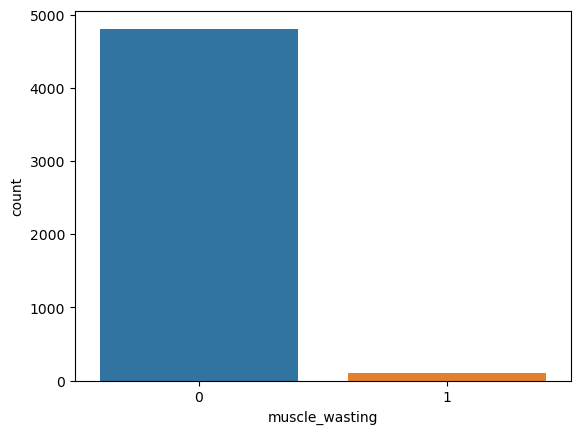

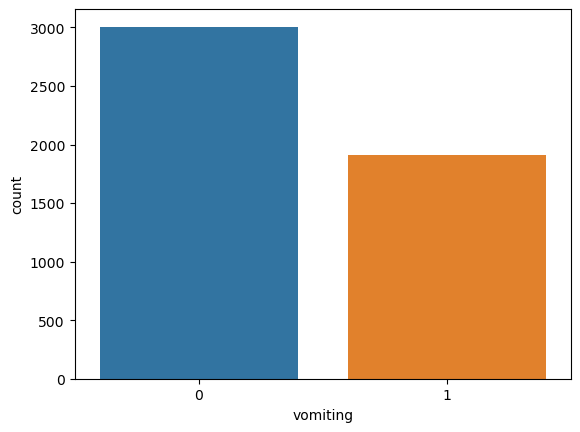

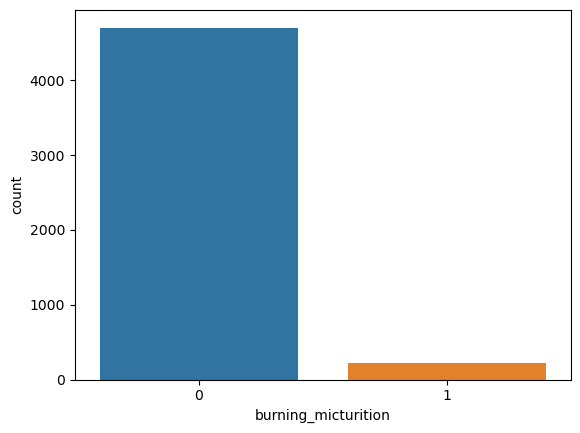

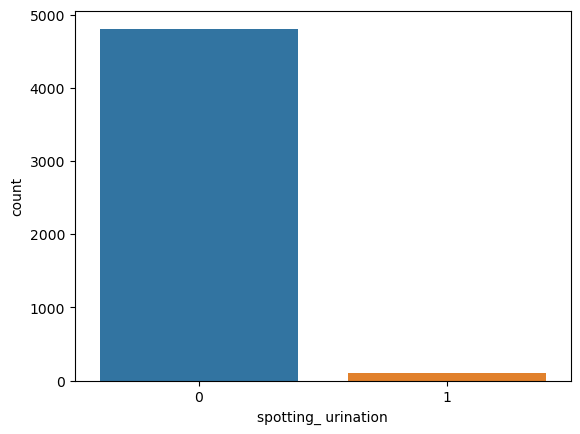

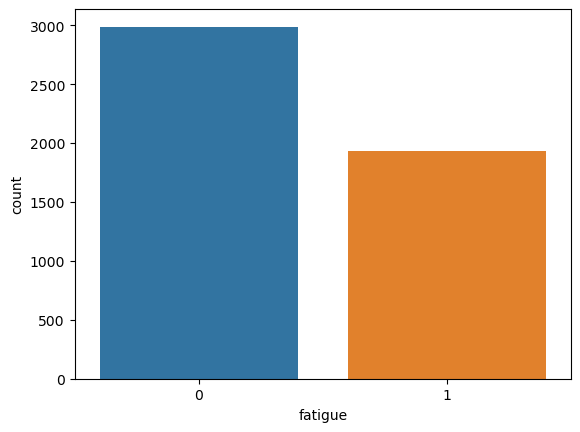

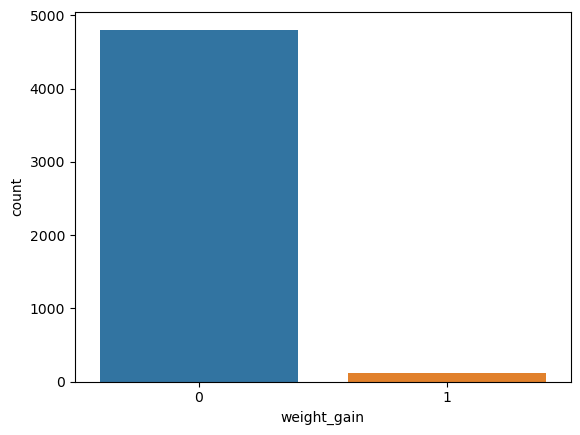

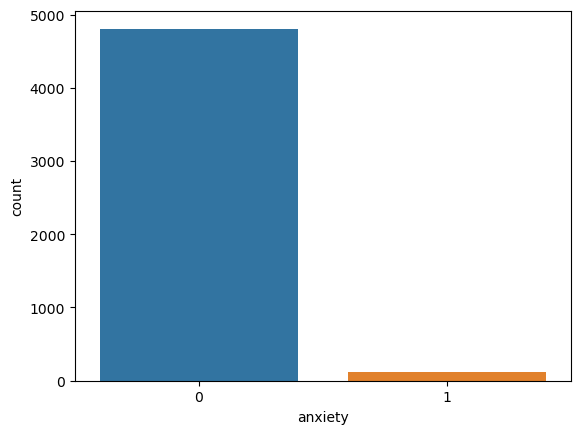

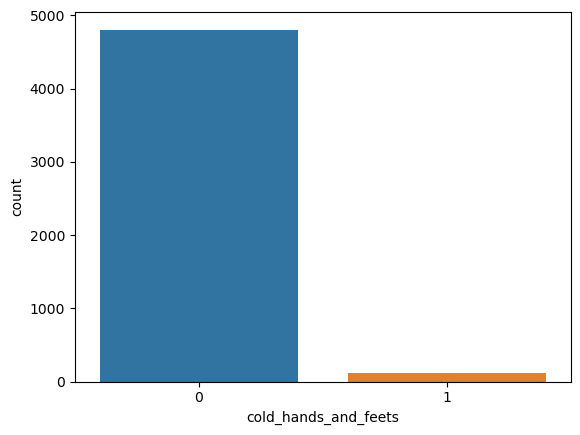

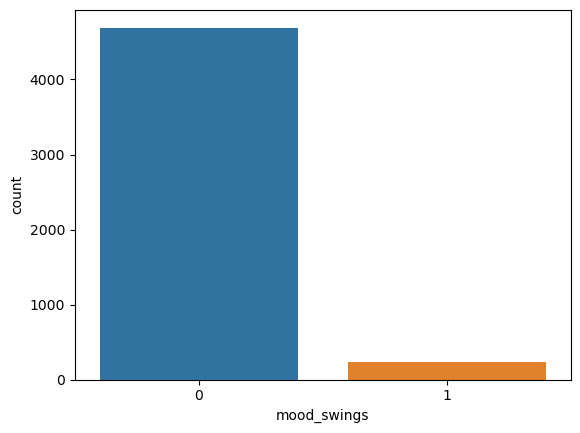

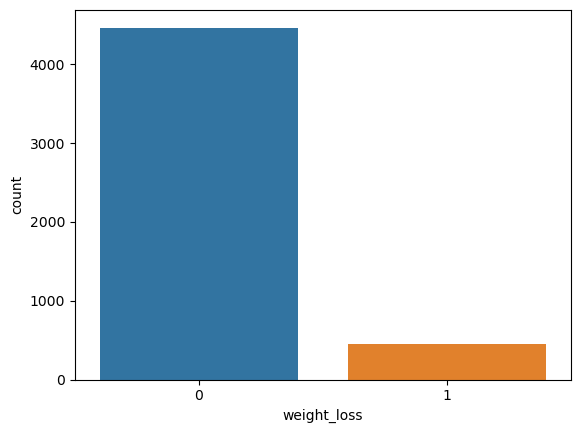

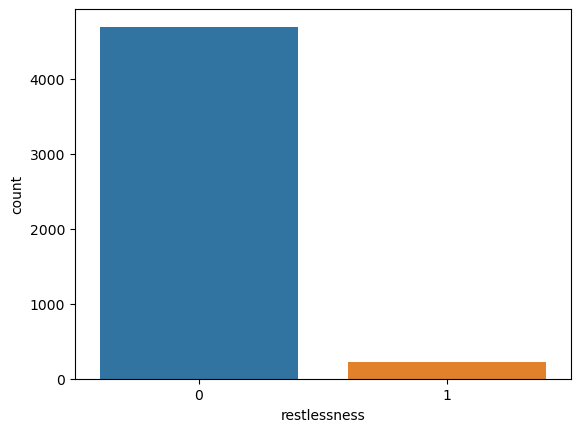

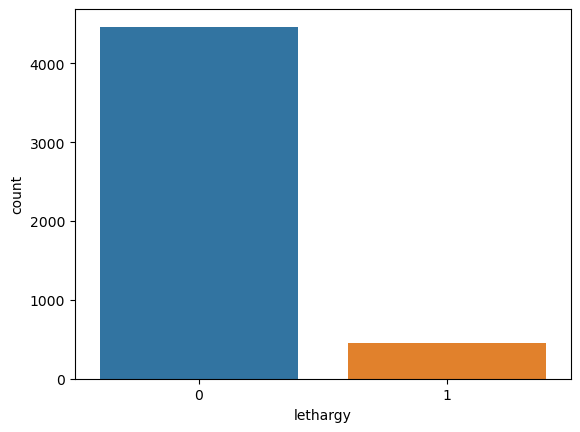

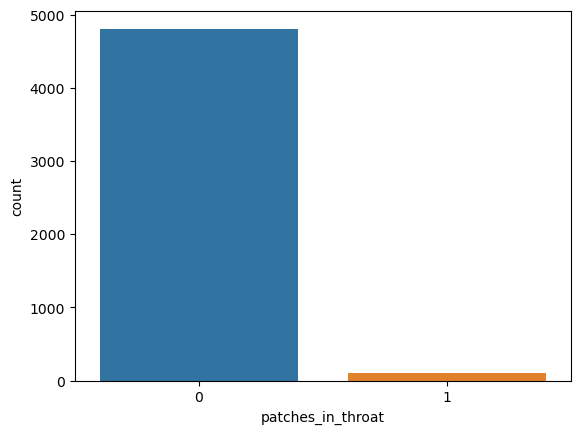

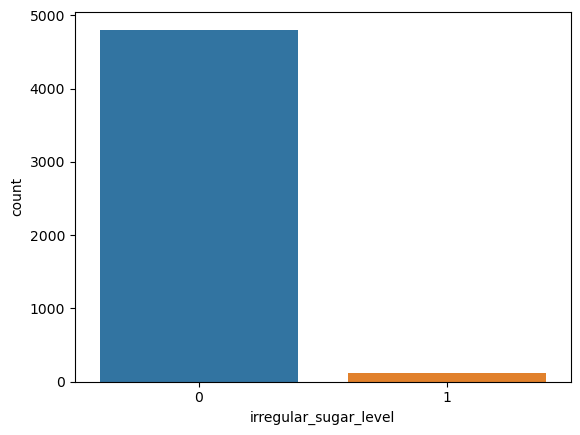

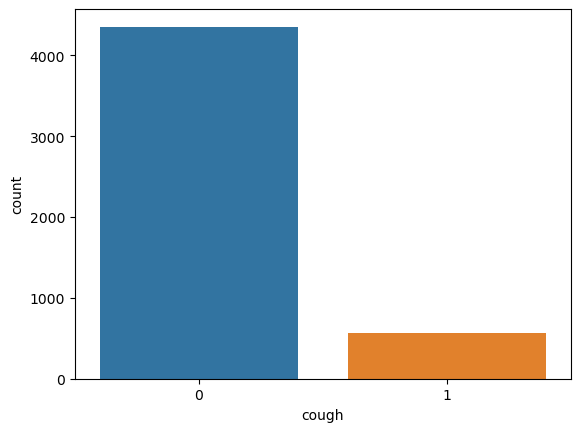

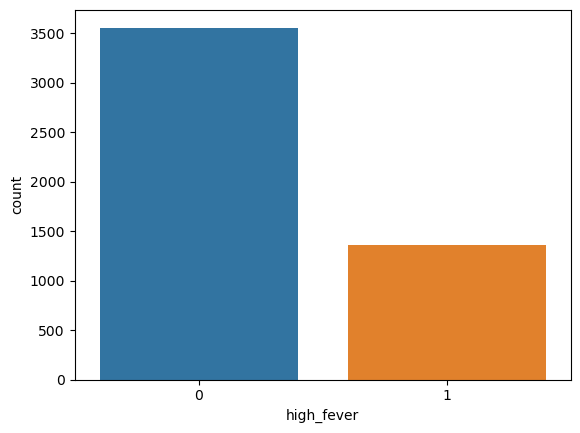

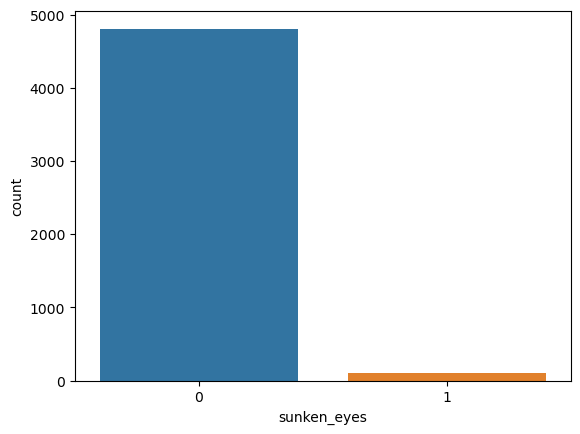

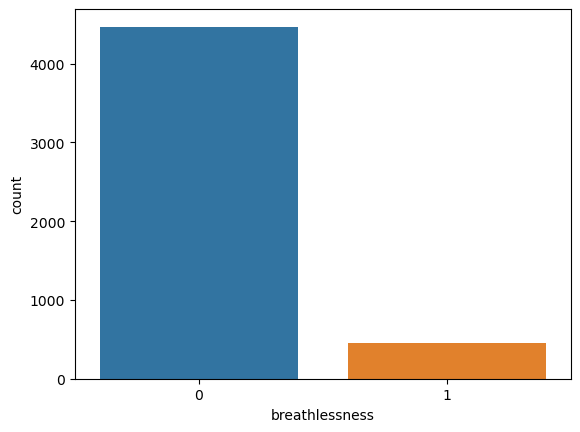

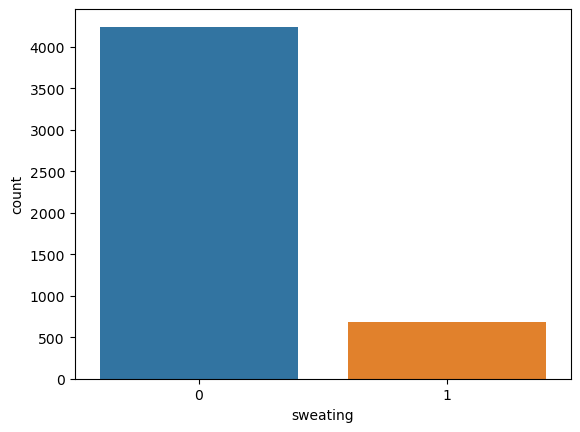

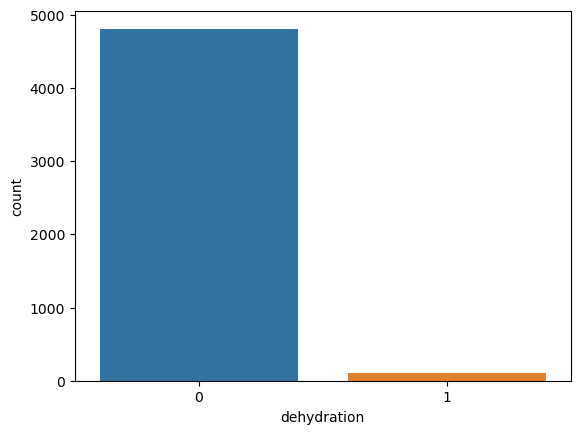

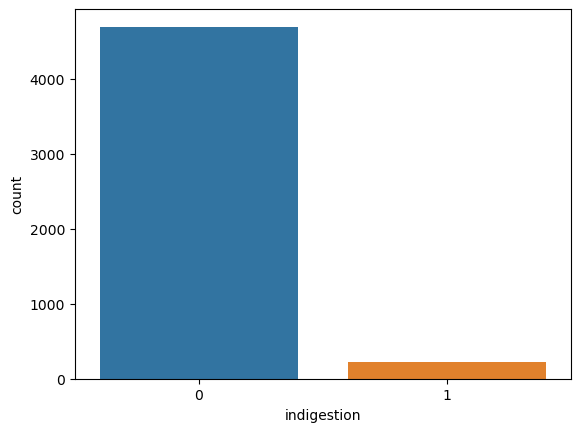

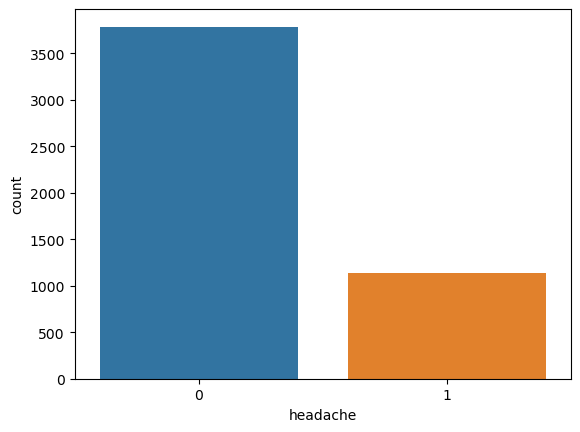

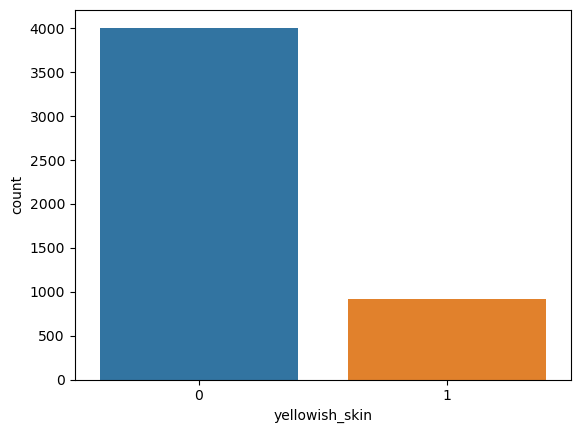

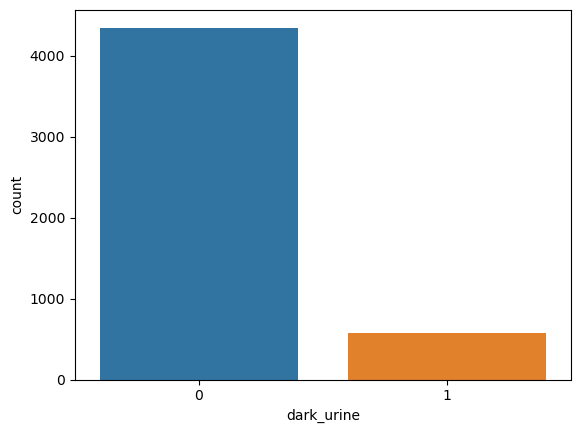

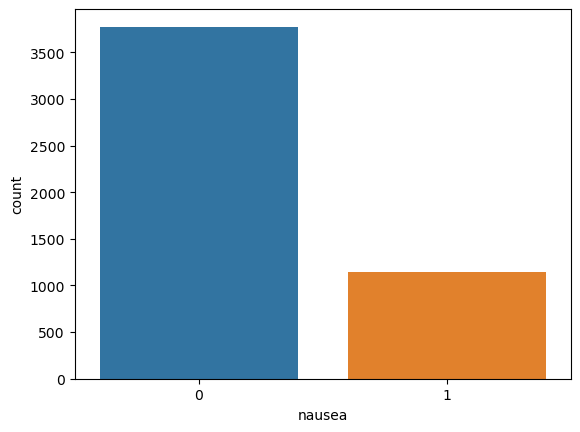

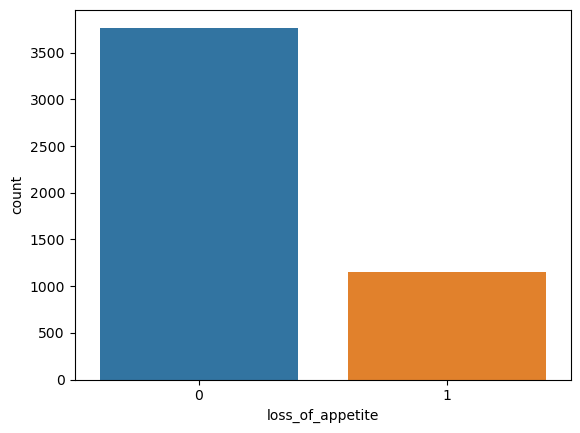

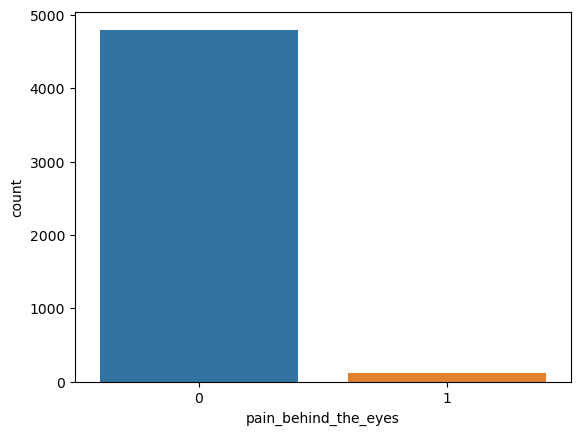

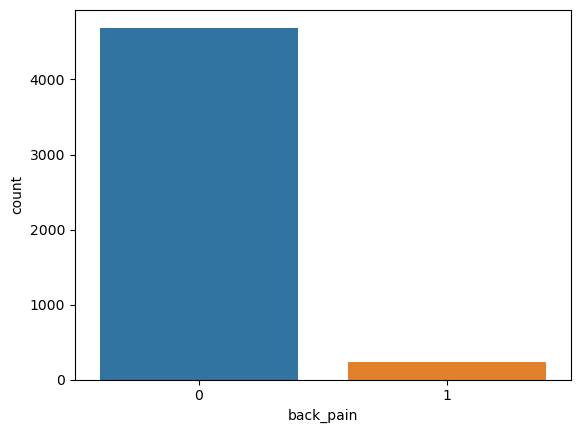

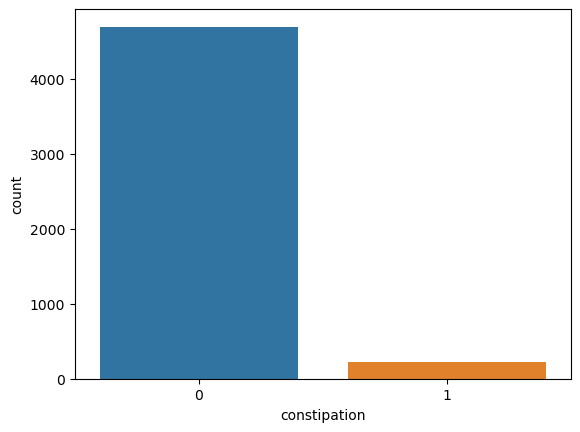

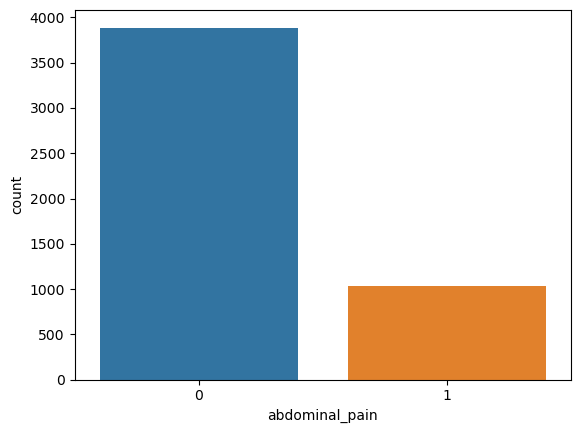

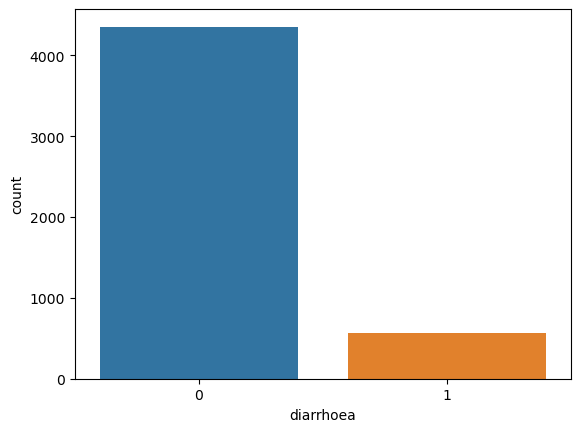

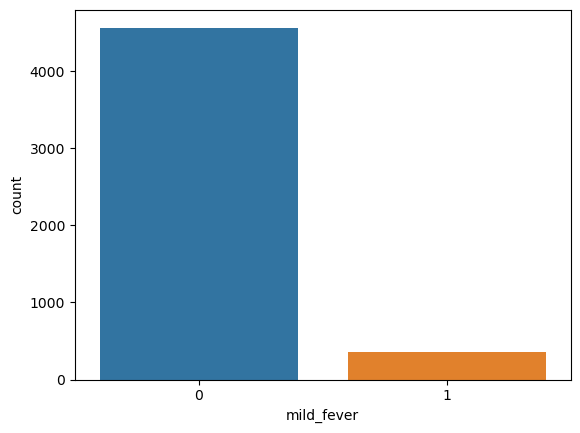

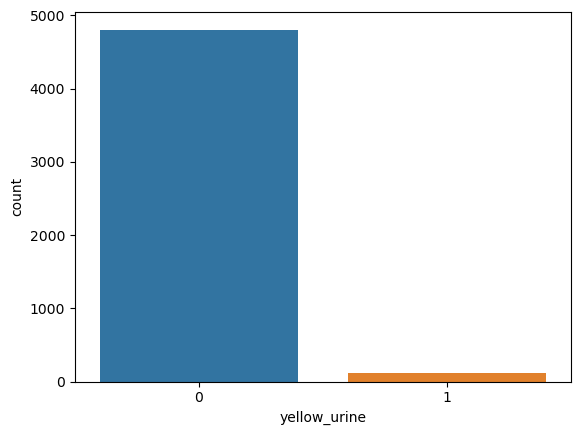

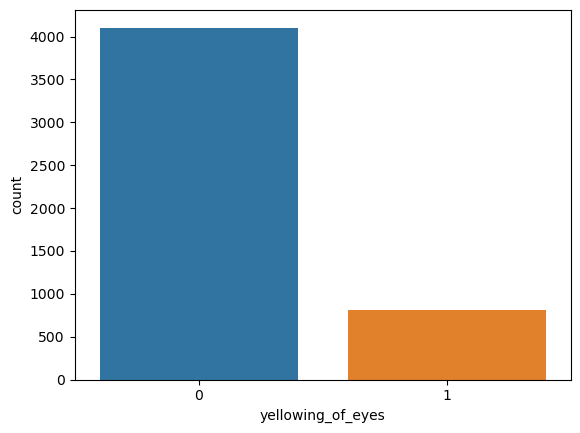

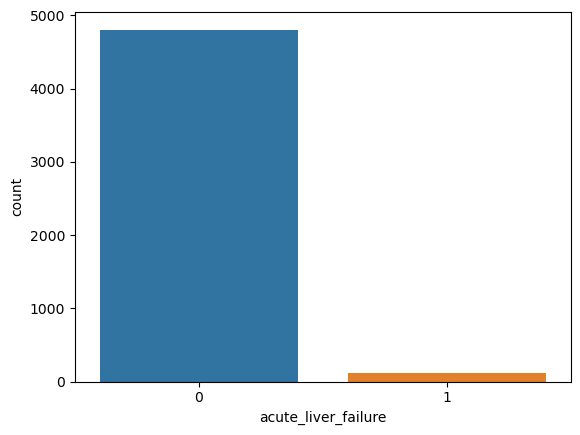

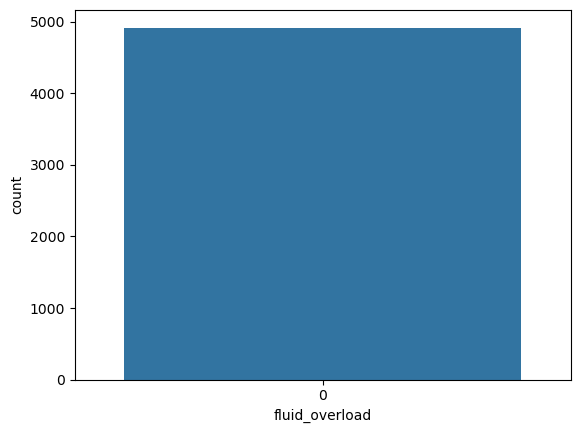

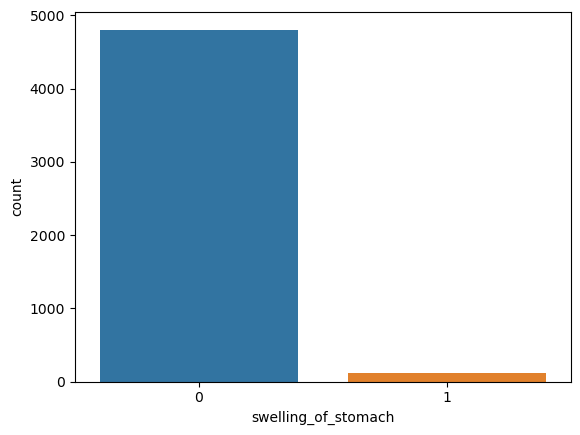

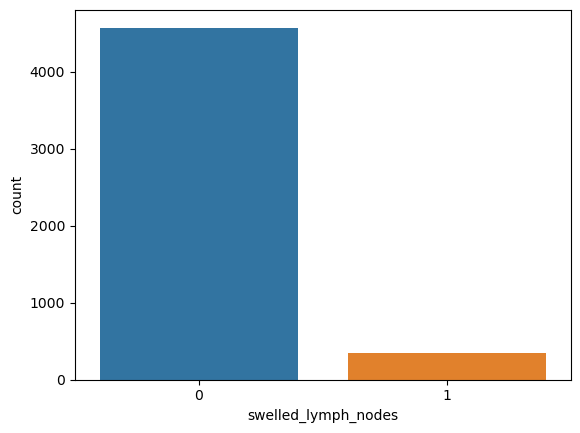

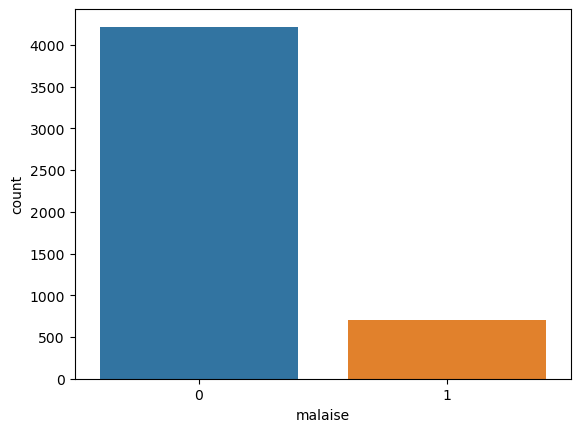

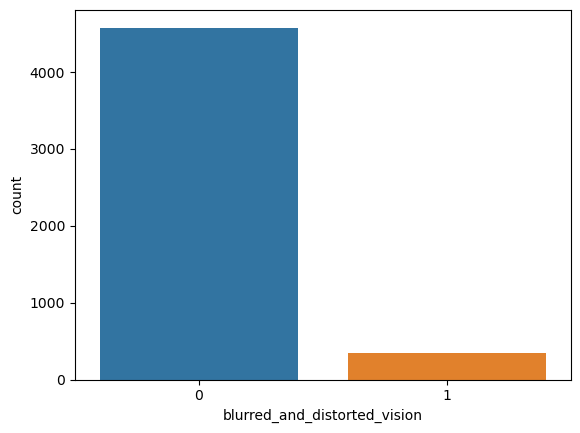

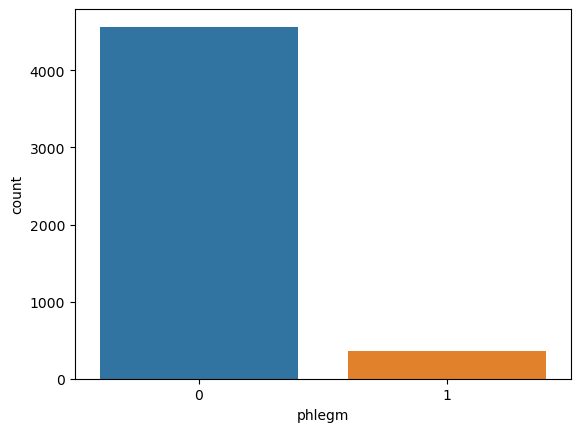

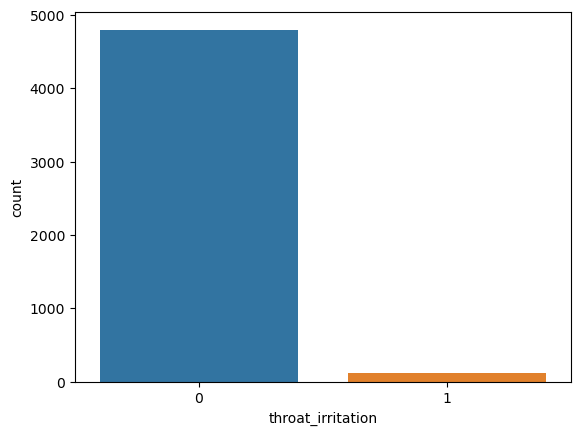

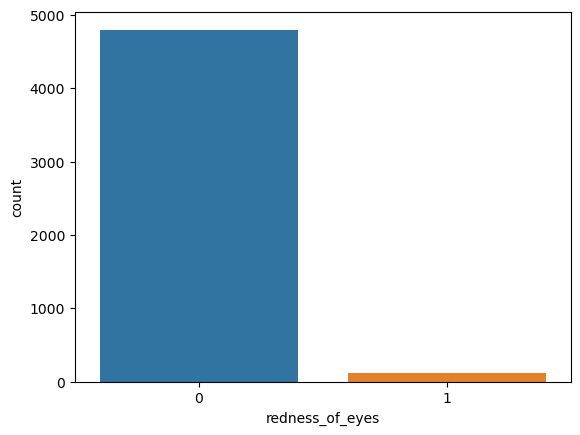

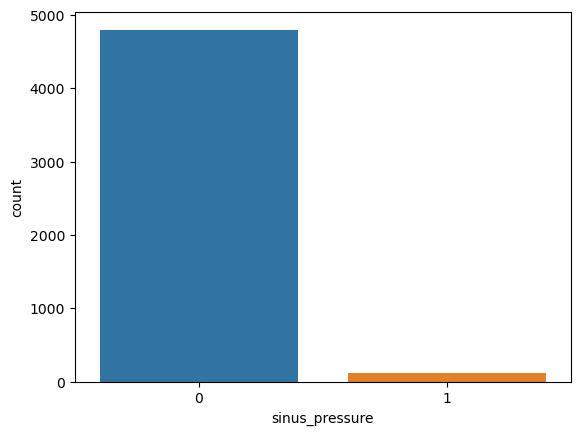

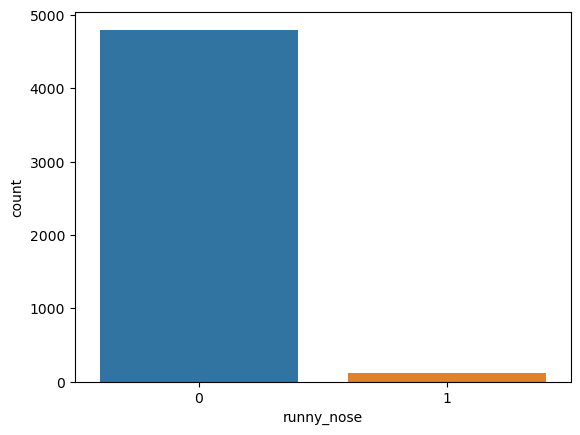

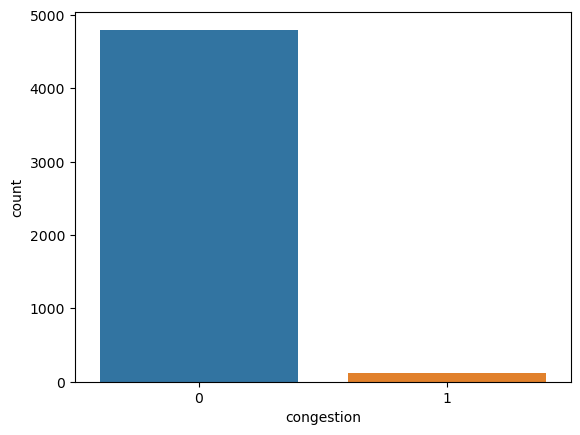

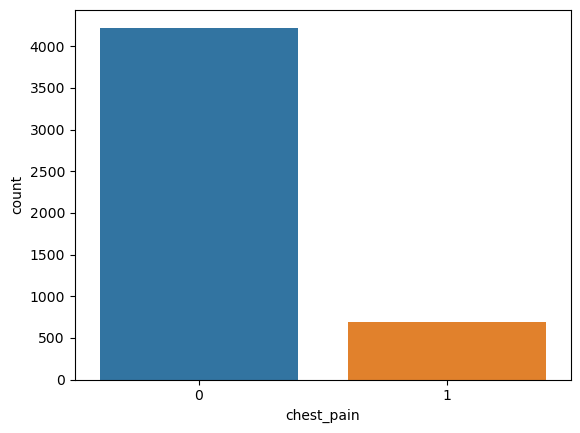

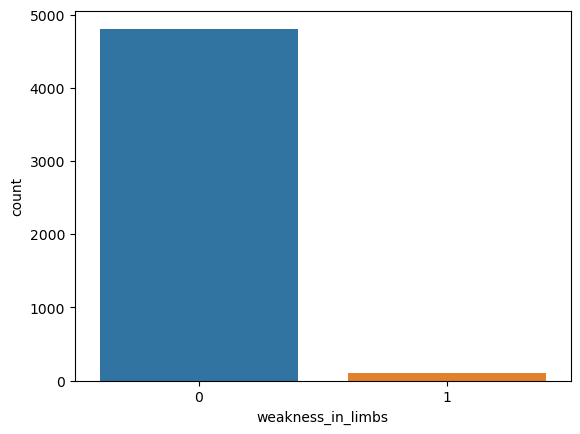

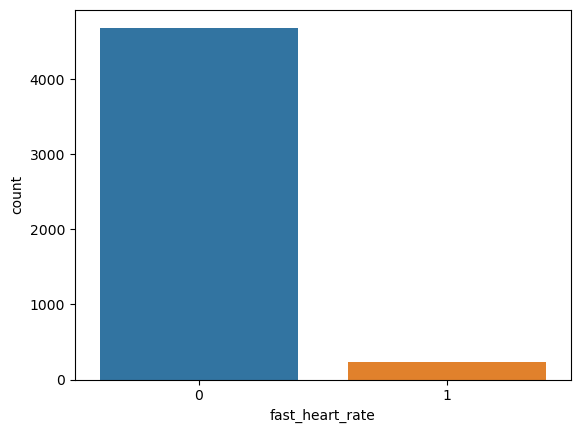

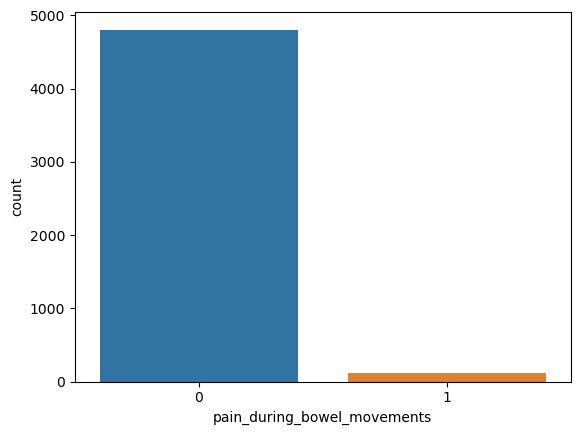

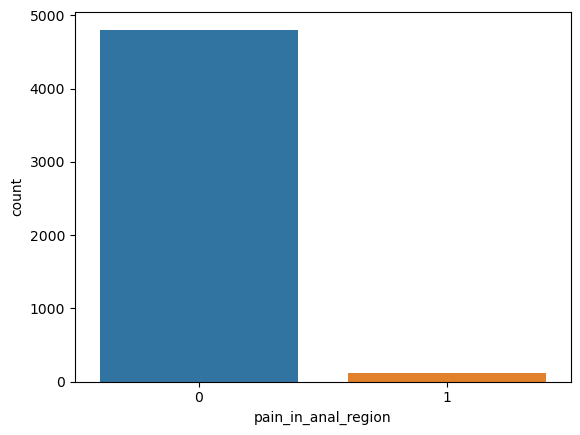

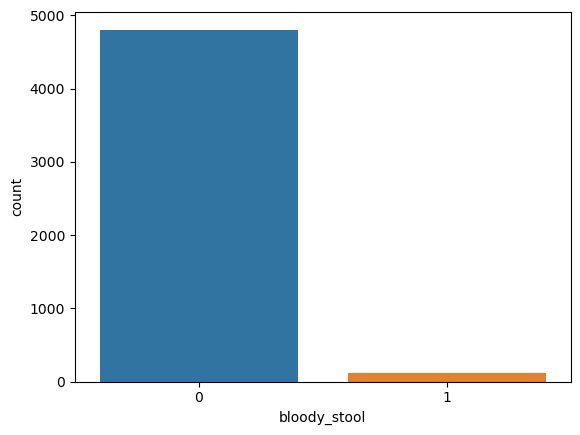

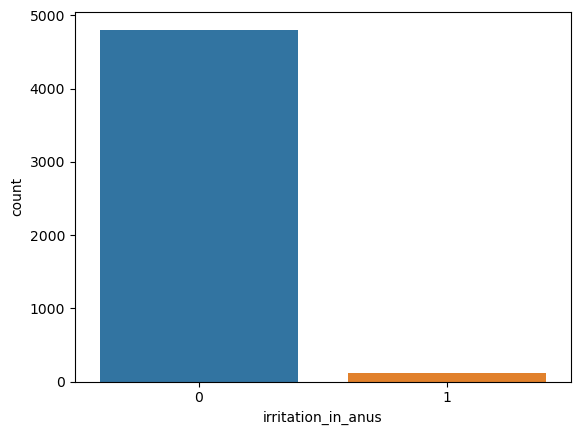

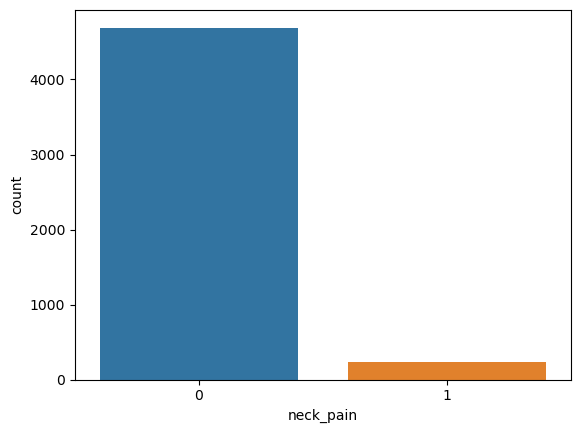

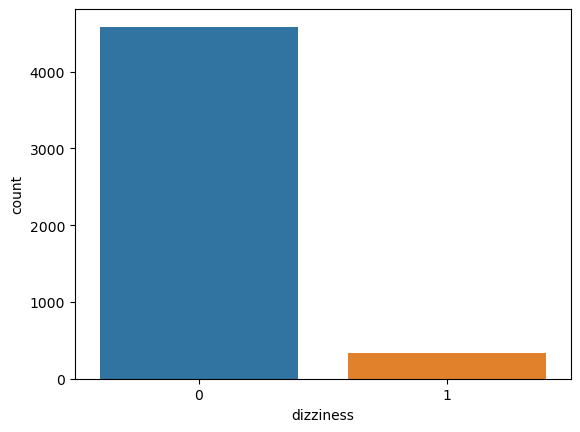

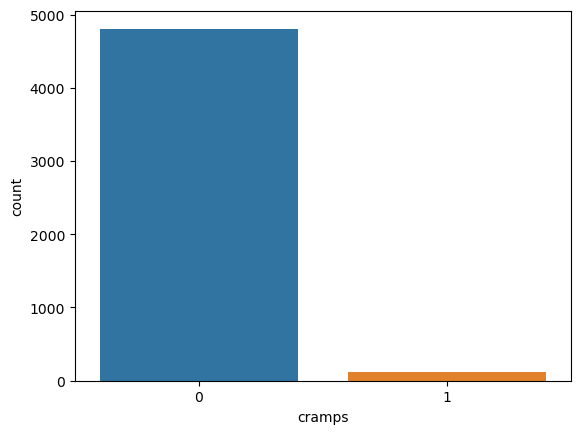

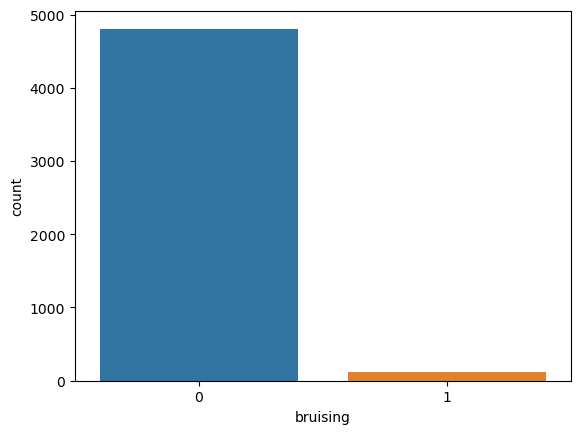

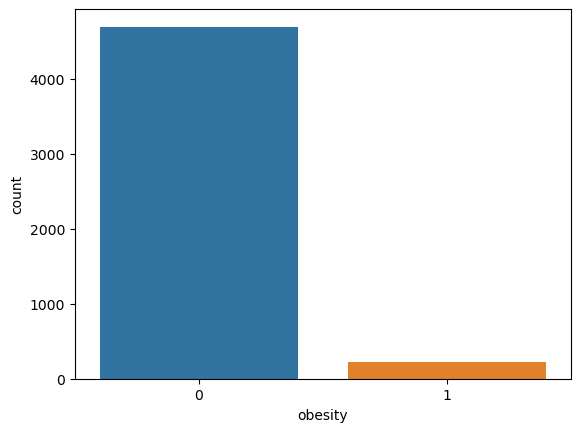

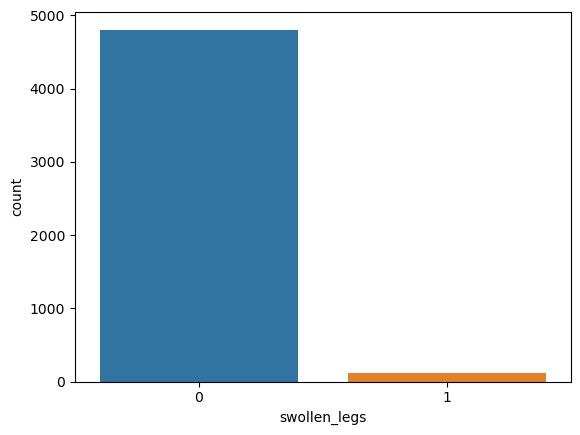

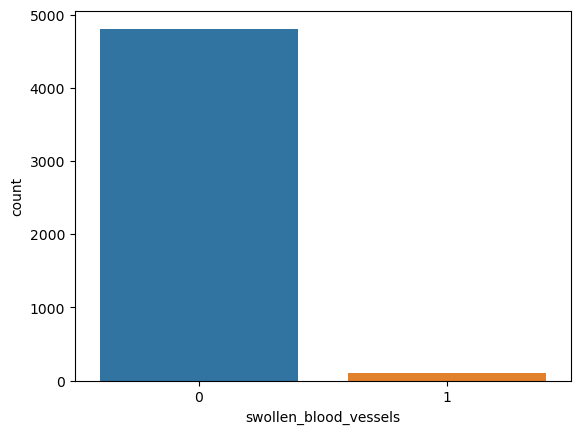

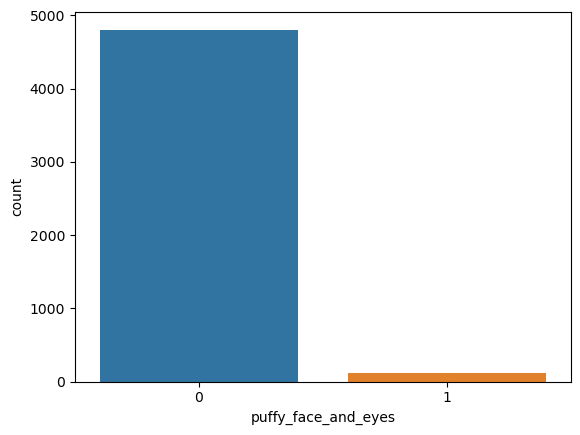

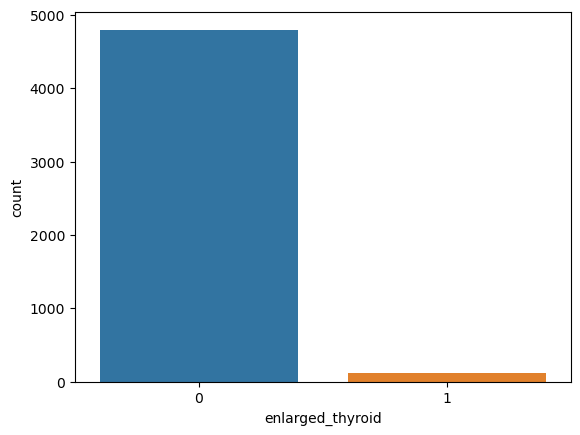

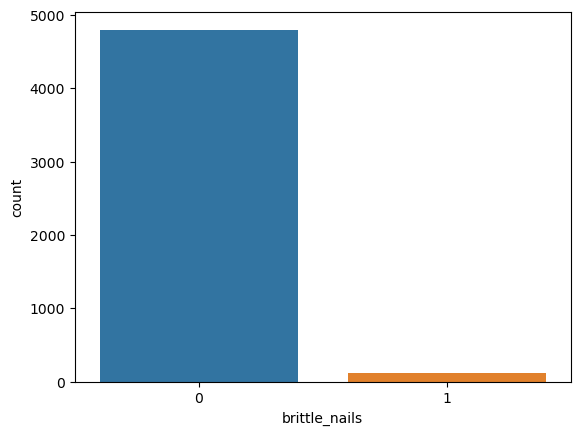

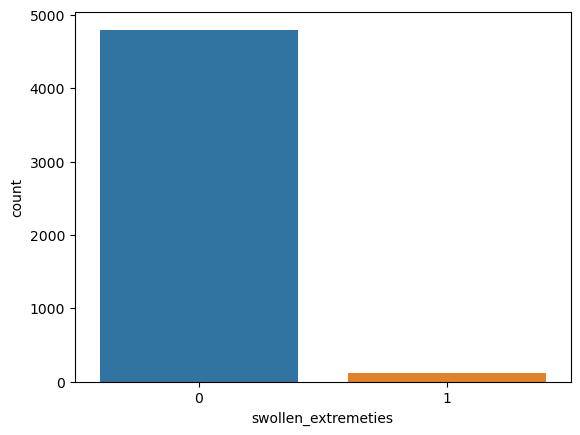

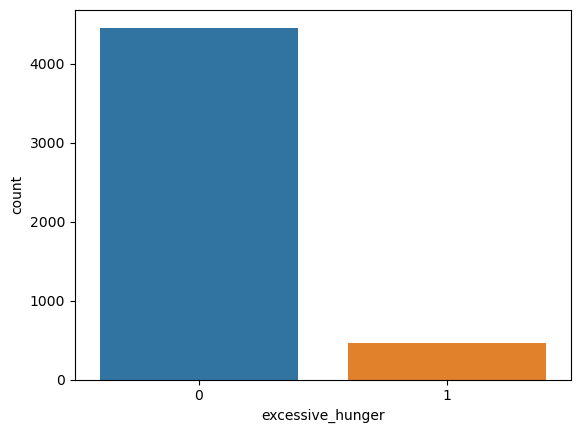

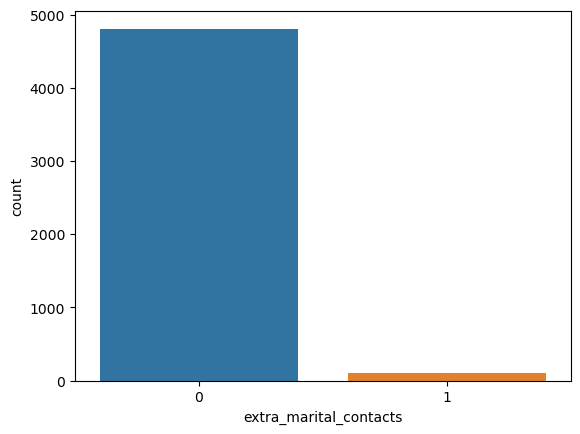

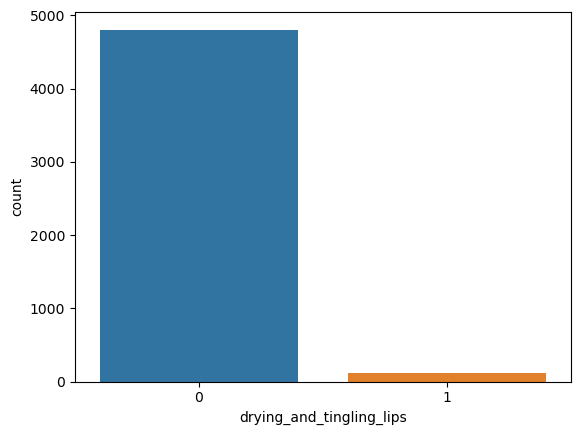

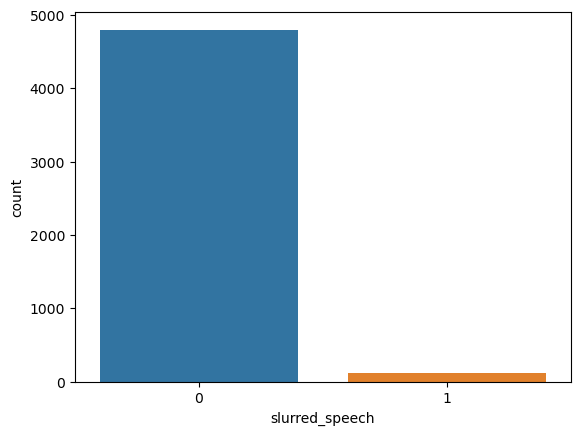

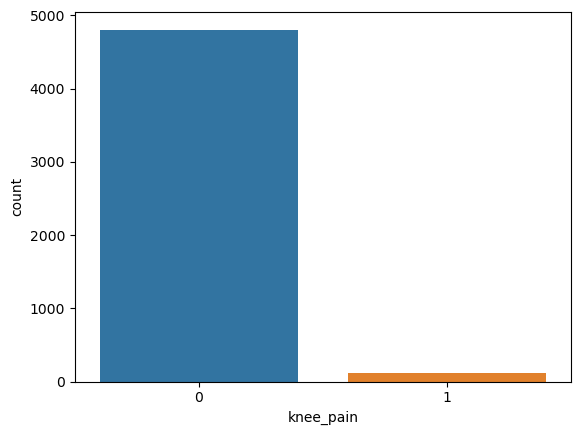

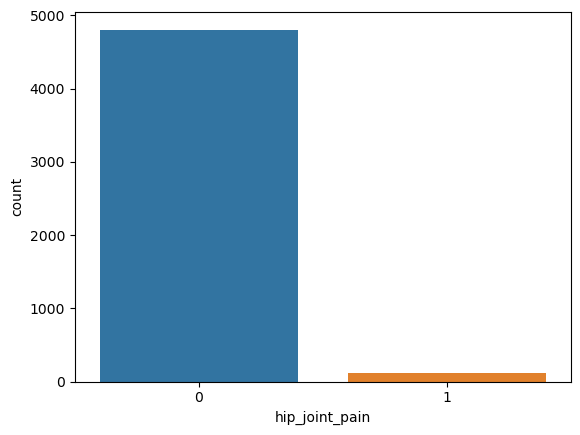

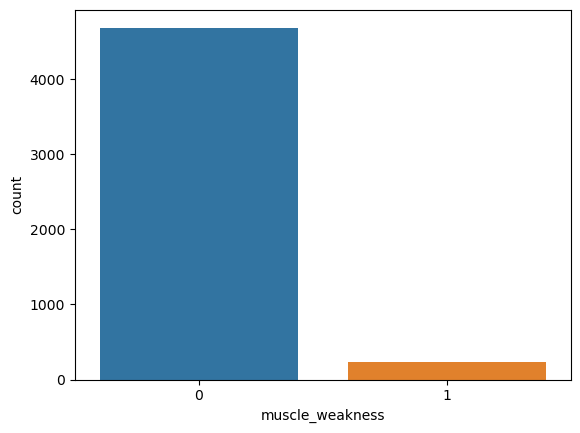

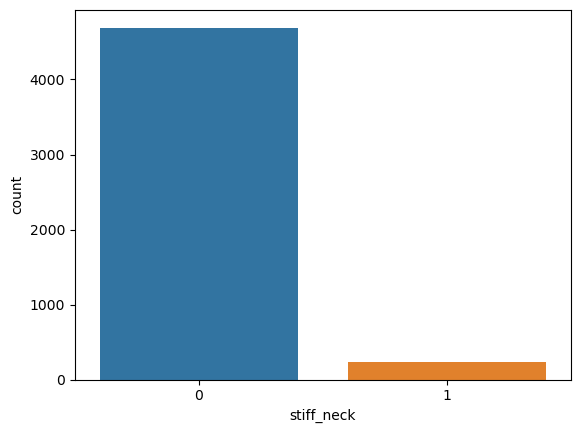

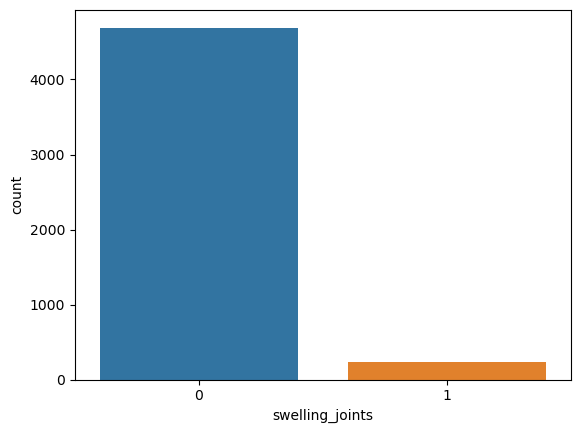

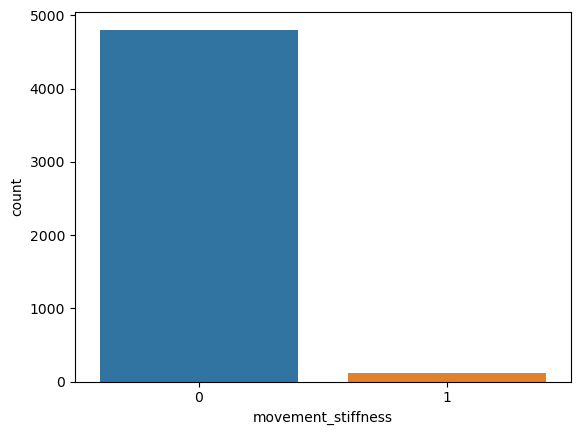

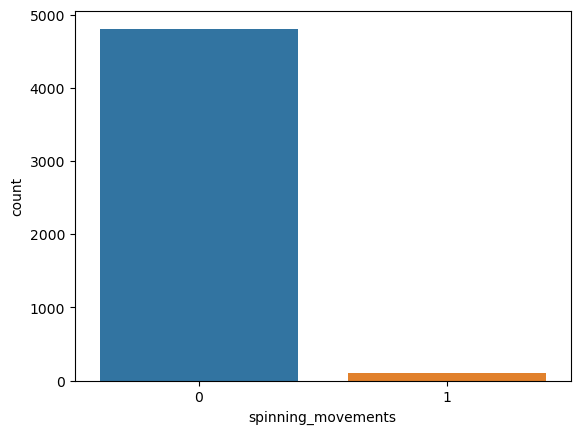

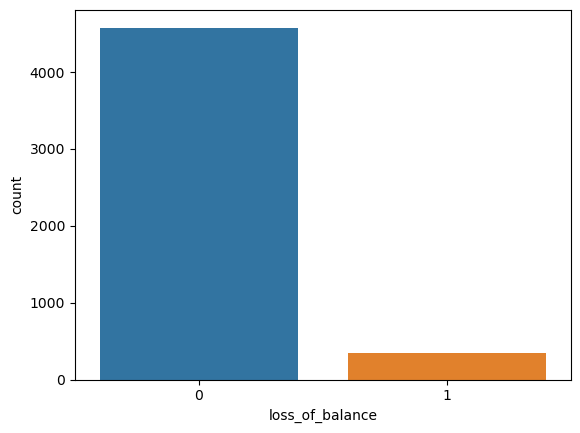

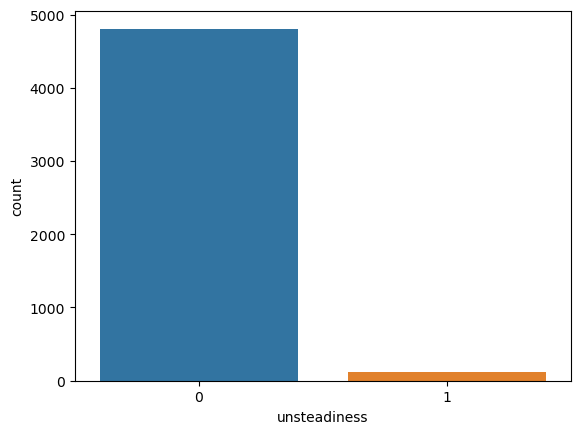

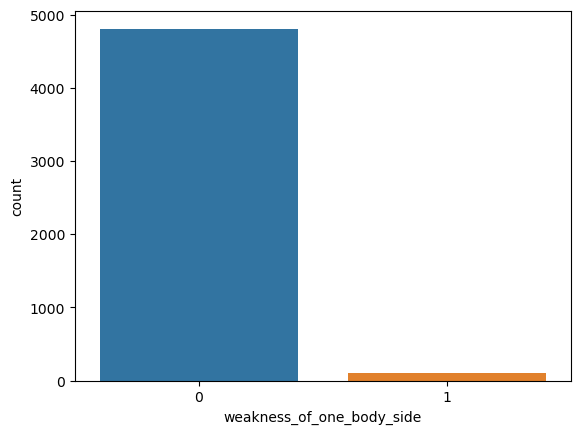

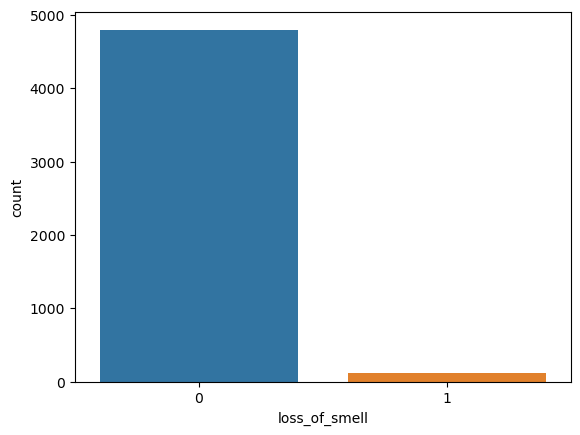

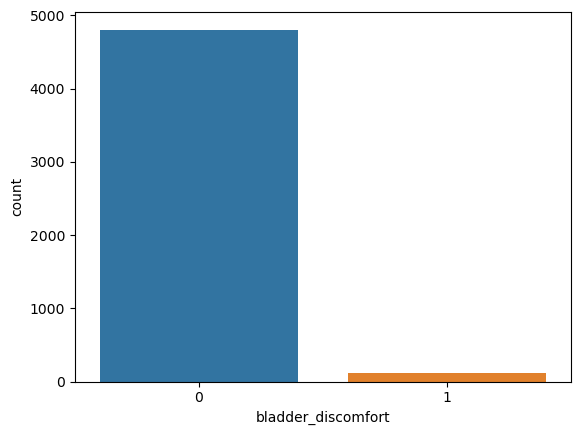

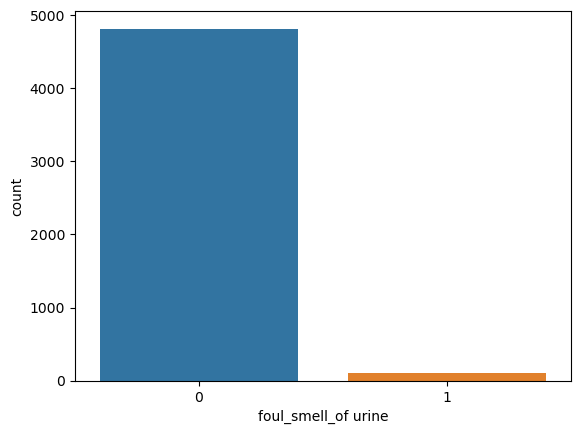

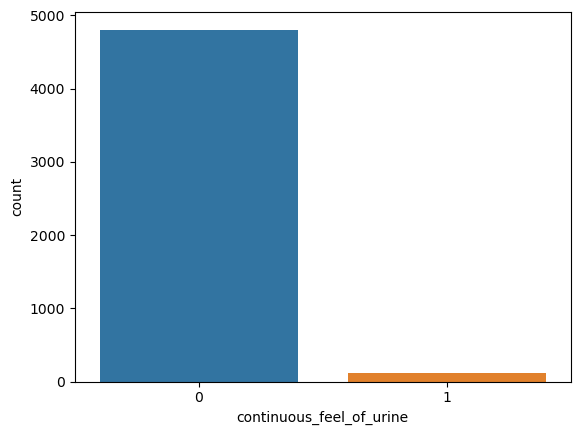

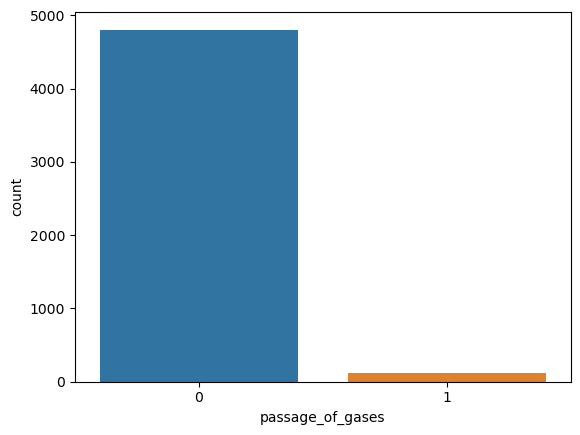

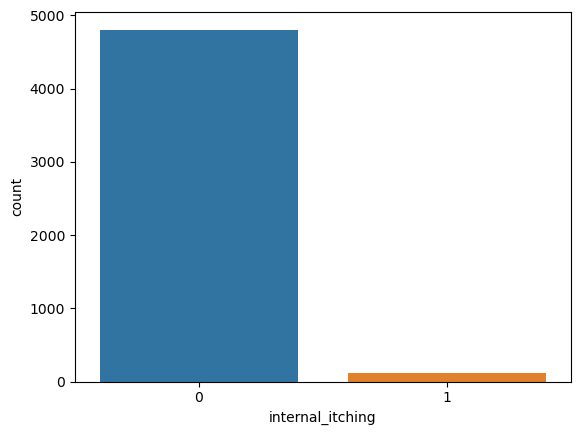

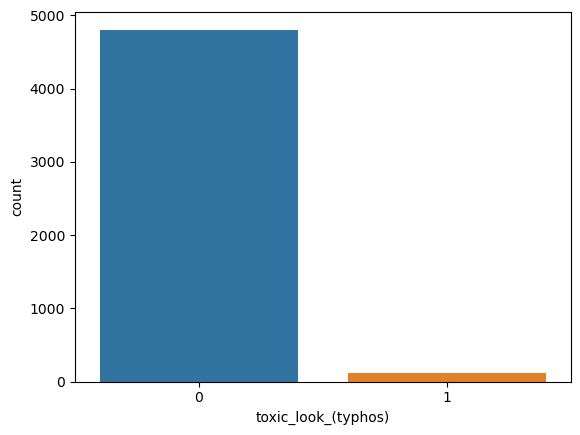

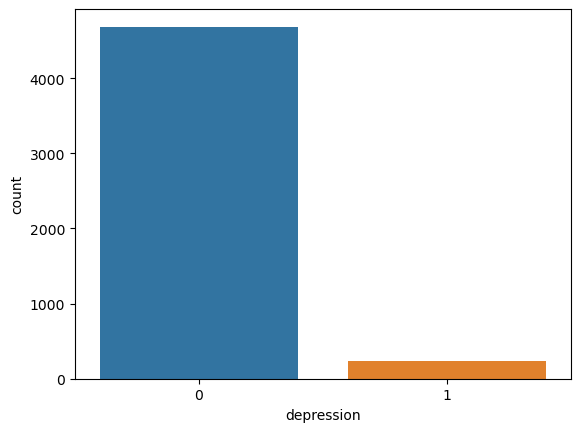

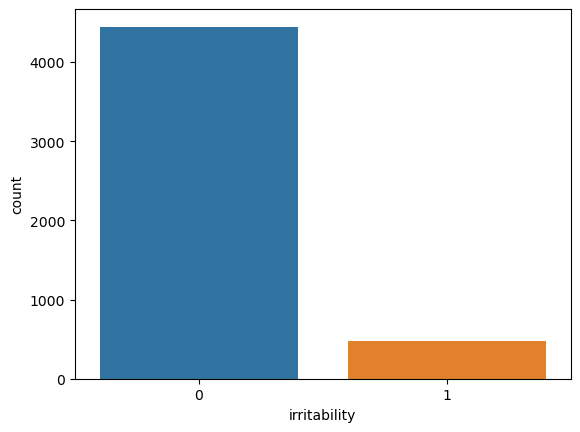

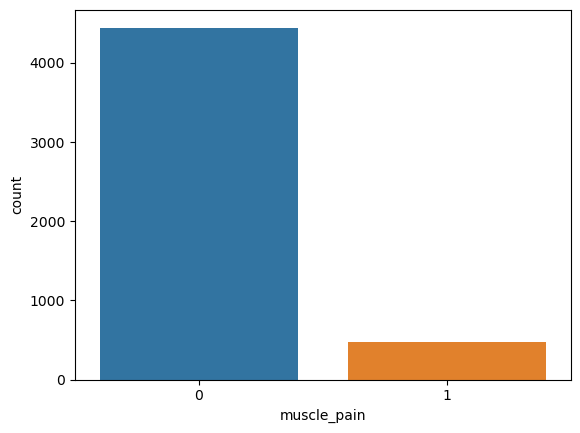

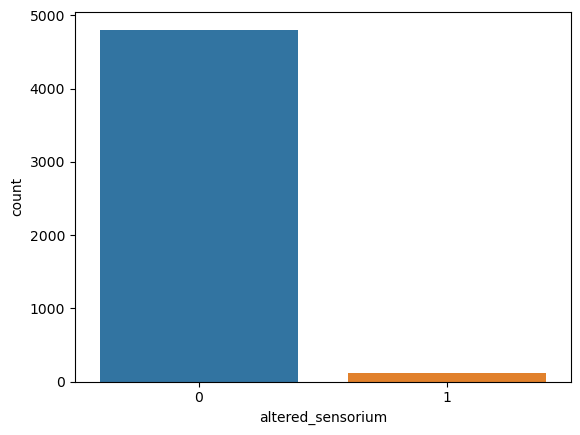

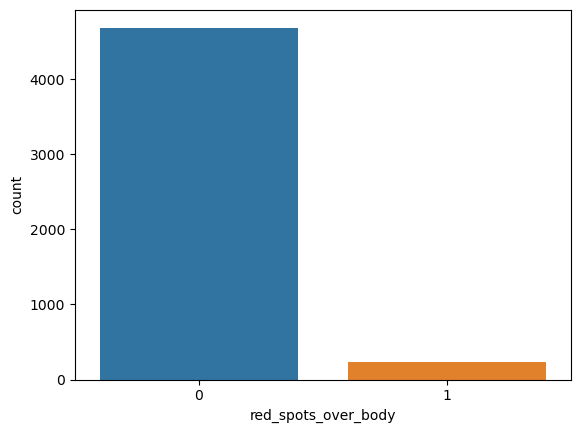

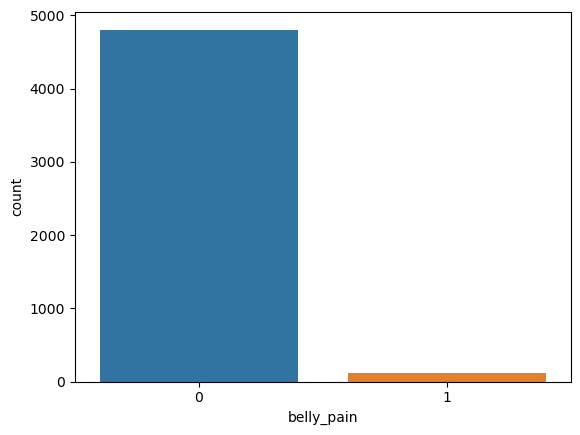

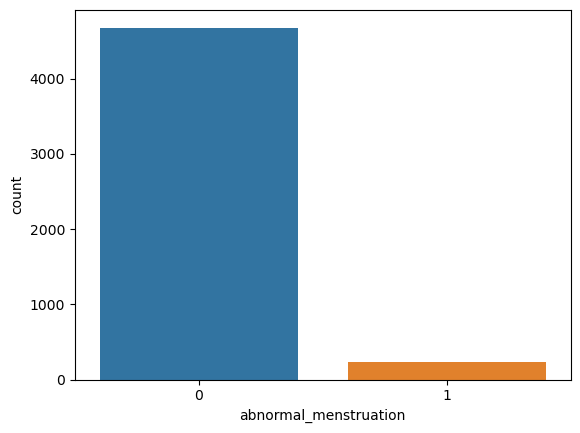

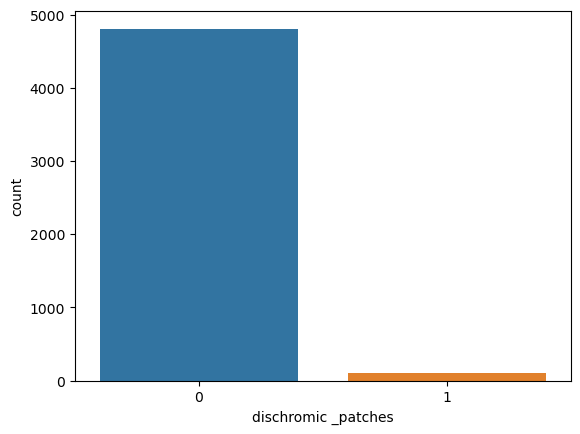

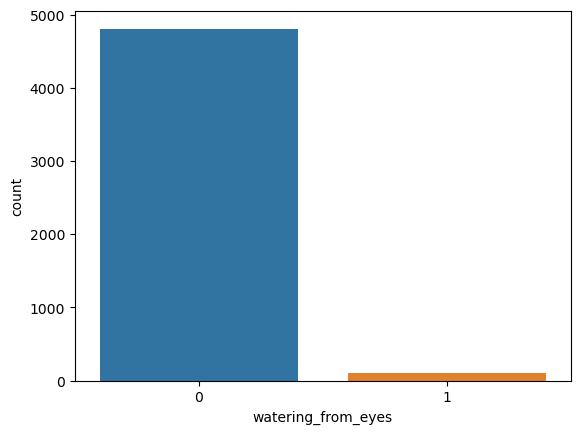

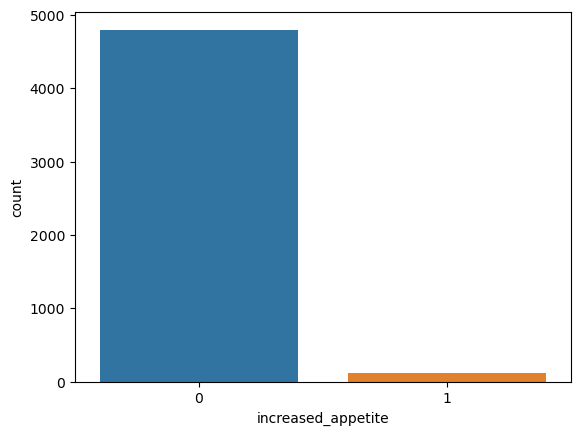

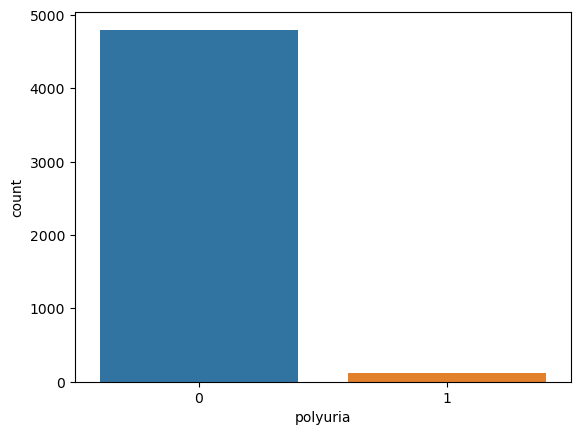

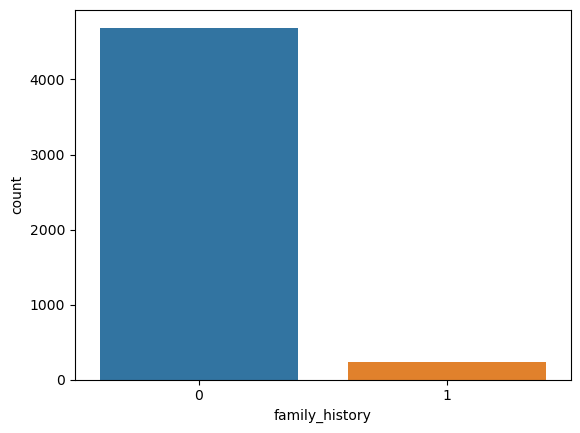

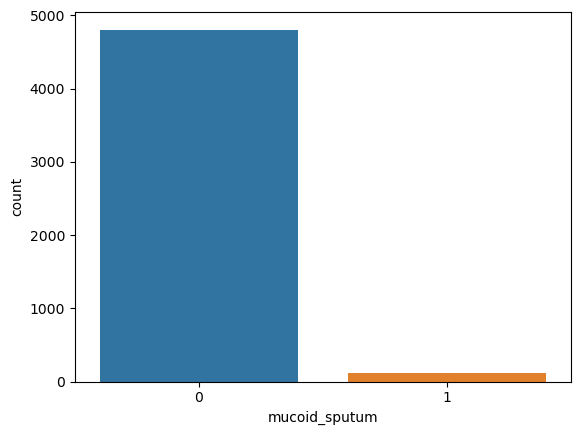

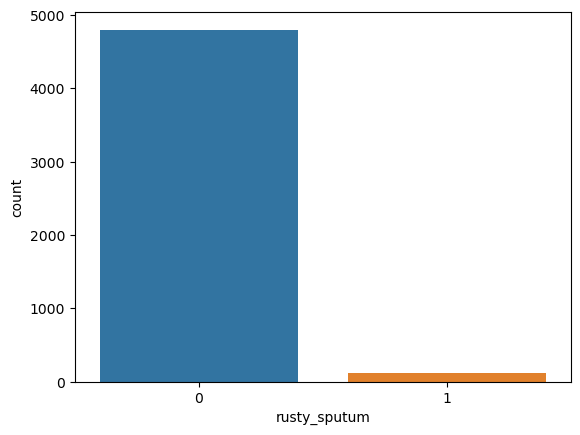

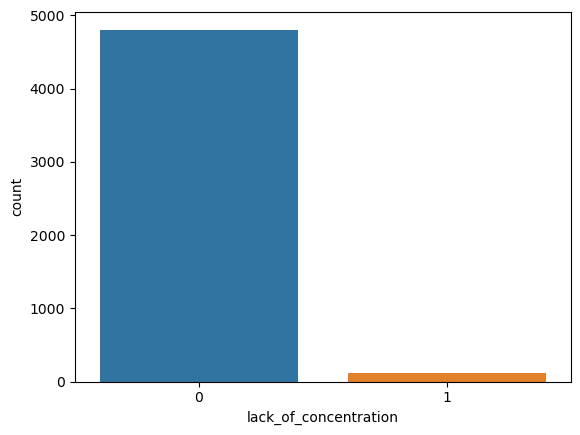

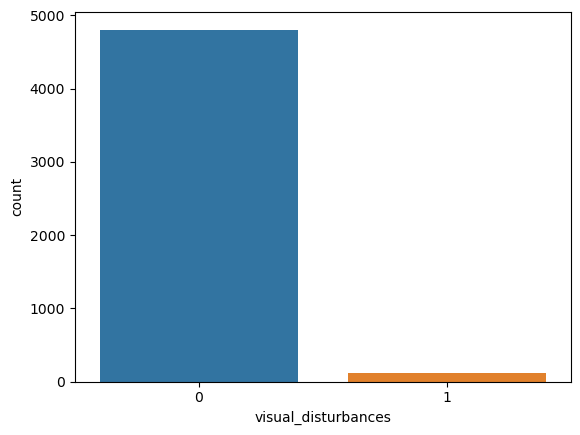

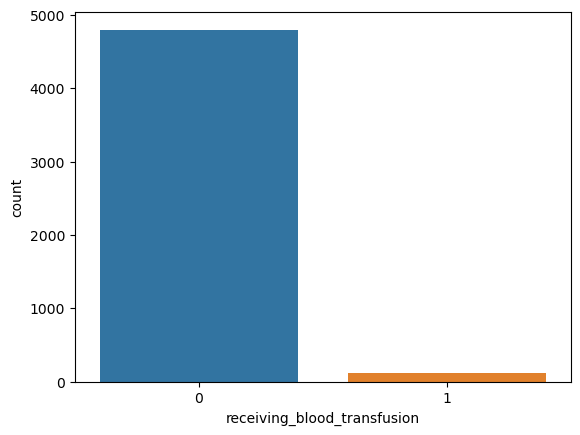

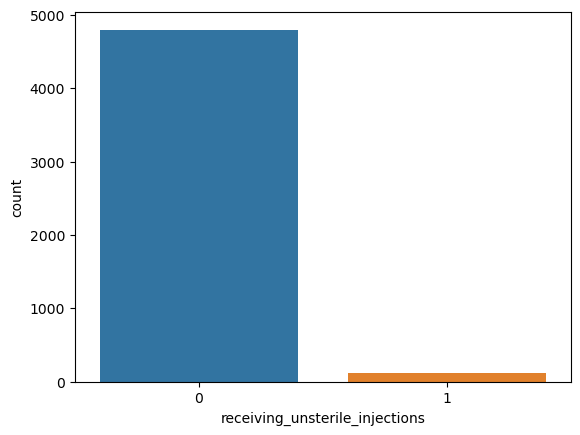

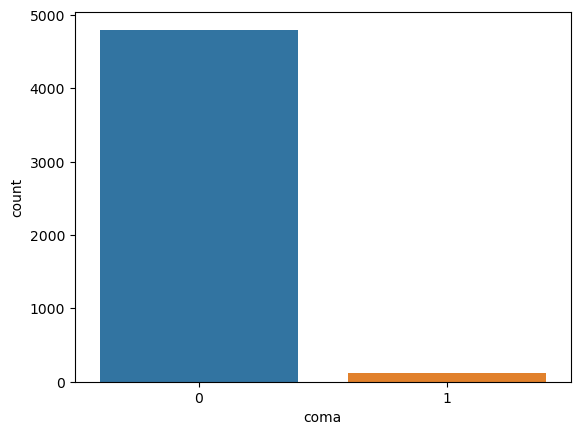

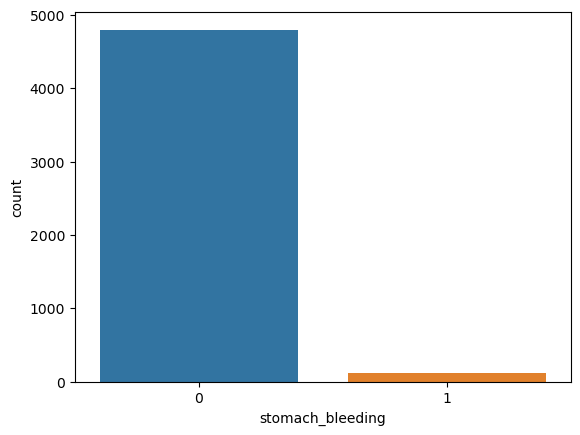

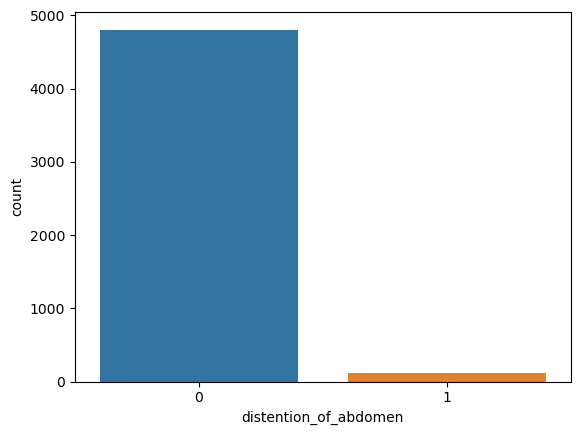

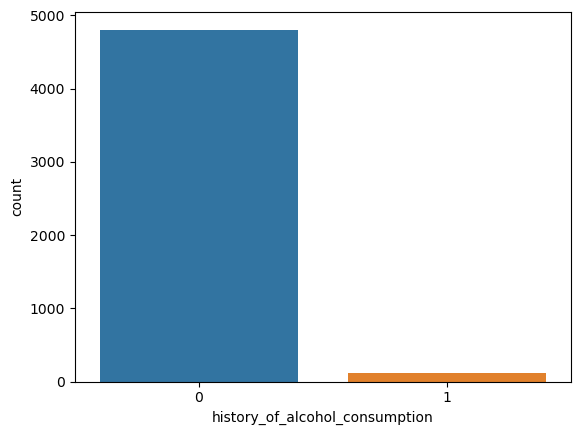

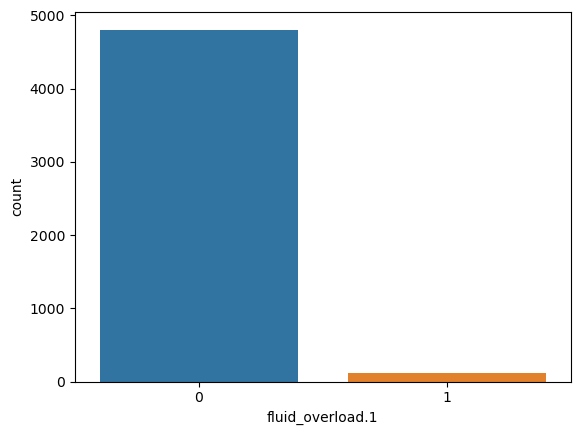

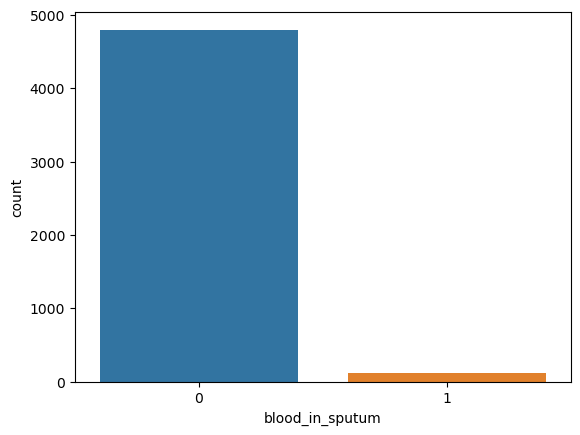

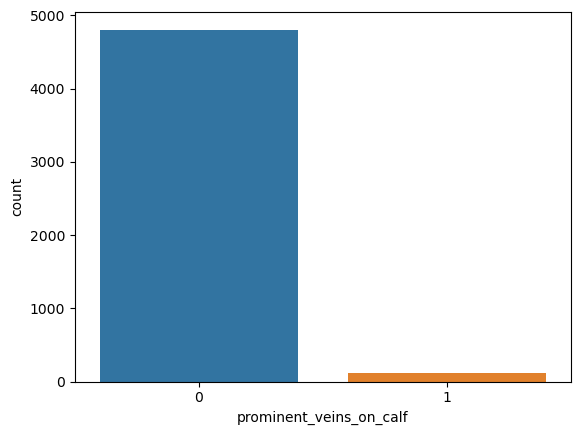

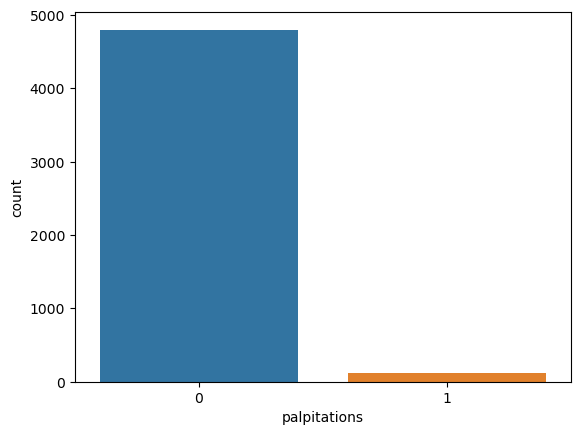

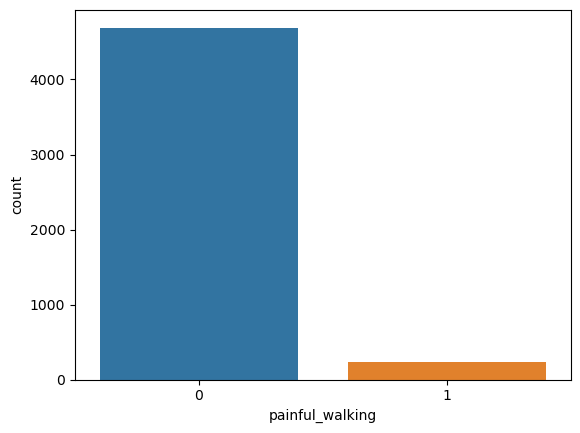

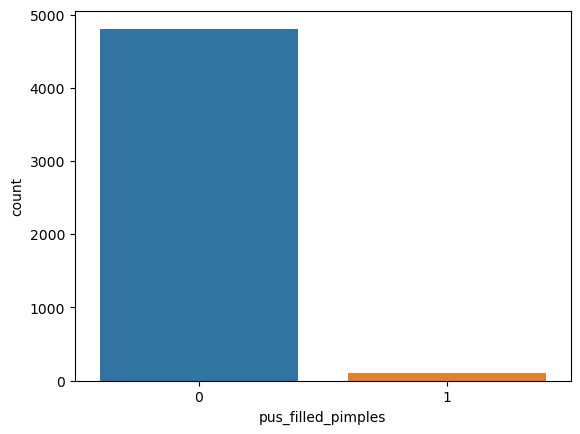

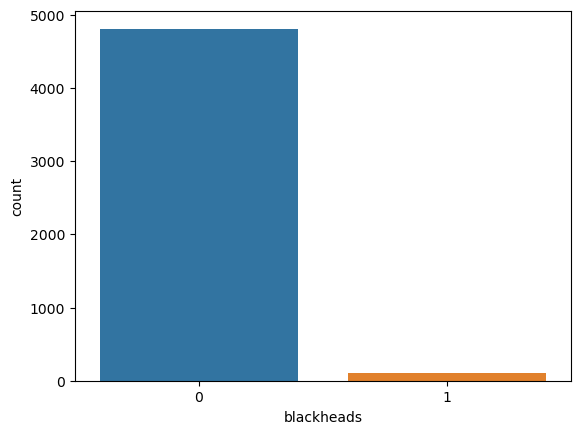

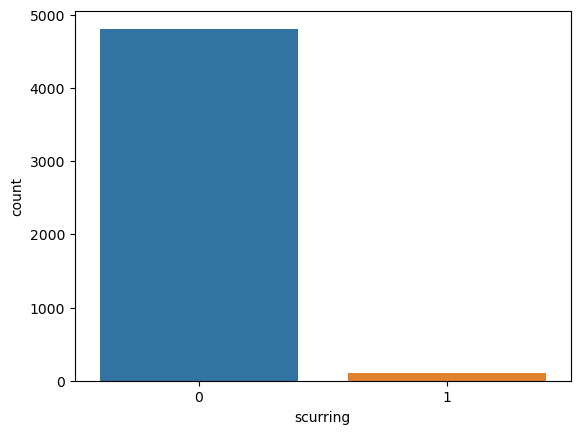

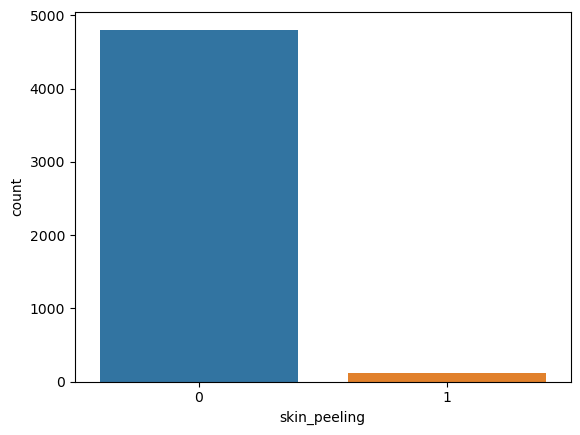

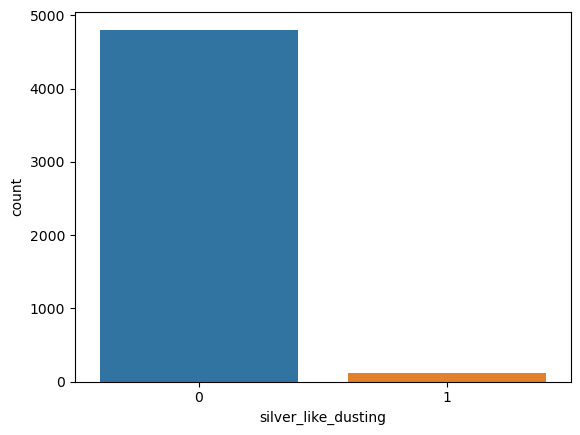

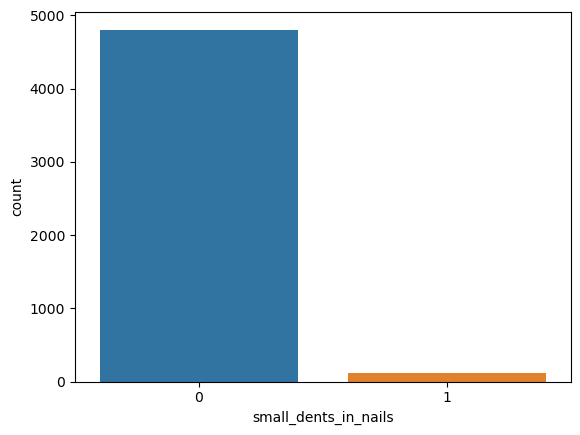

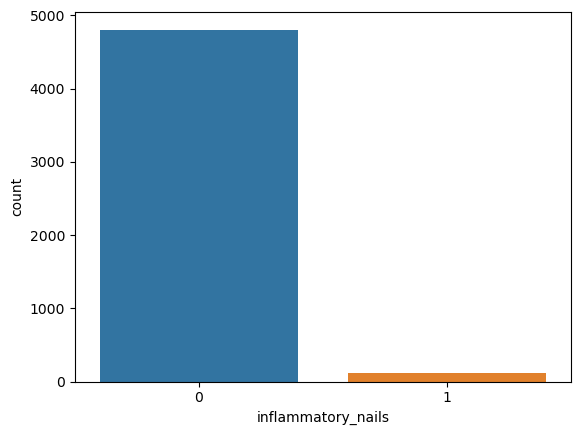

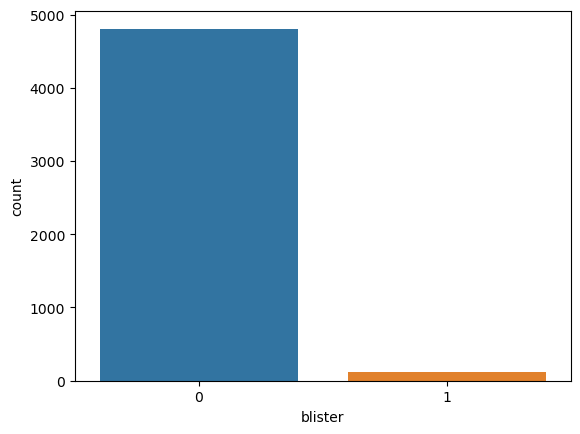

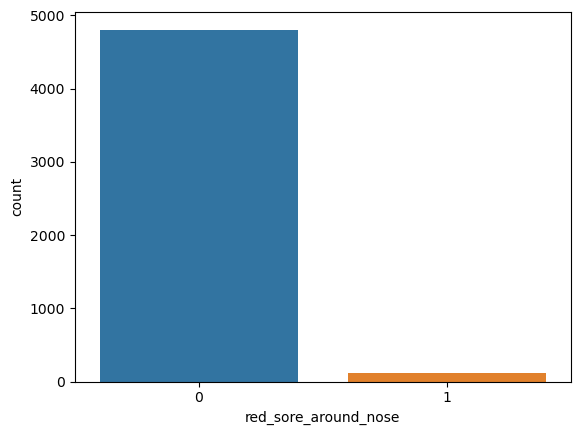

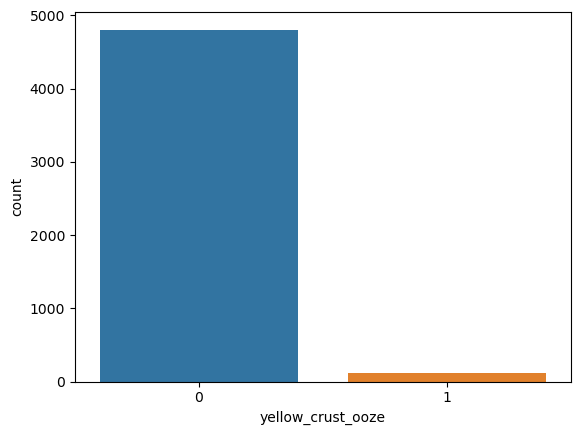

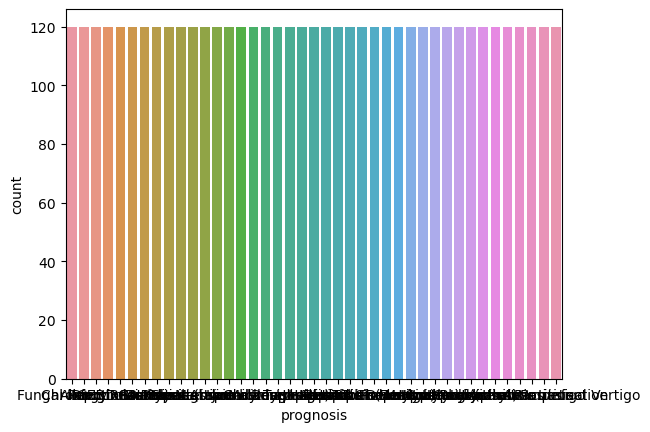

In [39]:
for disease in disease_df:
    sns.countplot(data=disease_df, x=disease)
    plt.show()

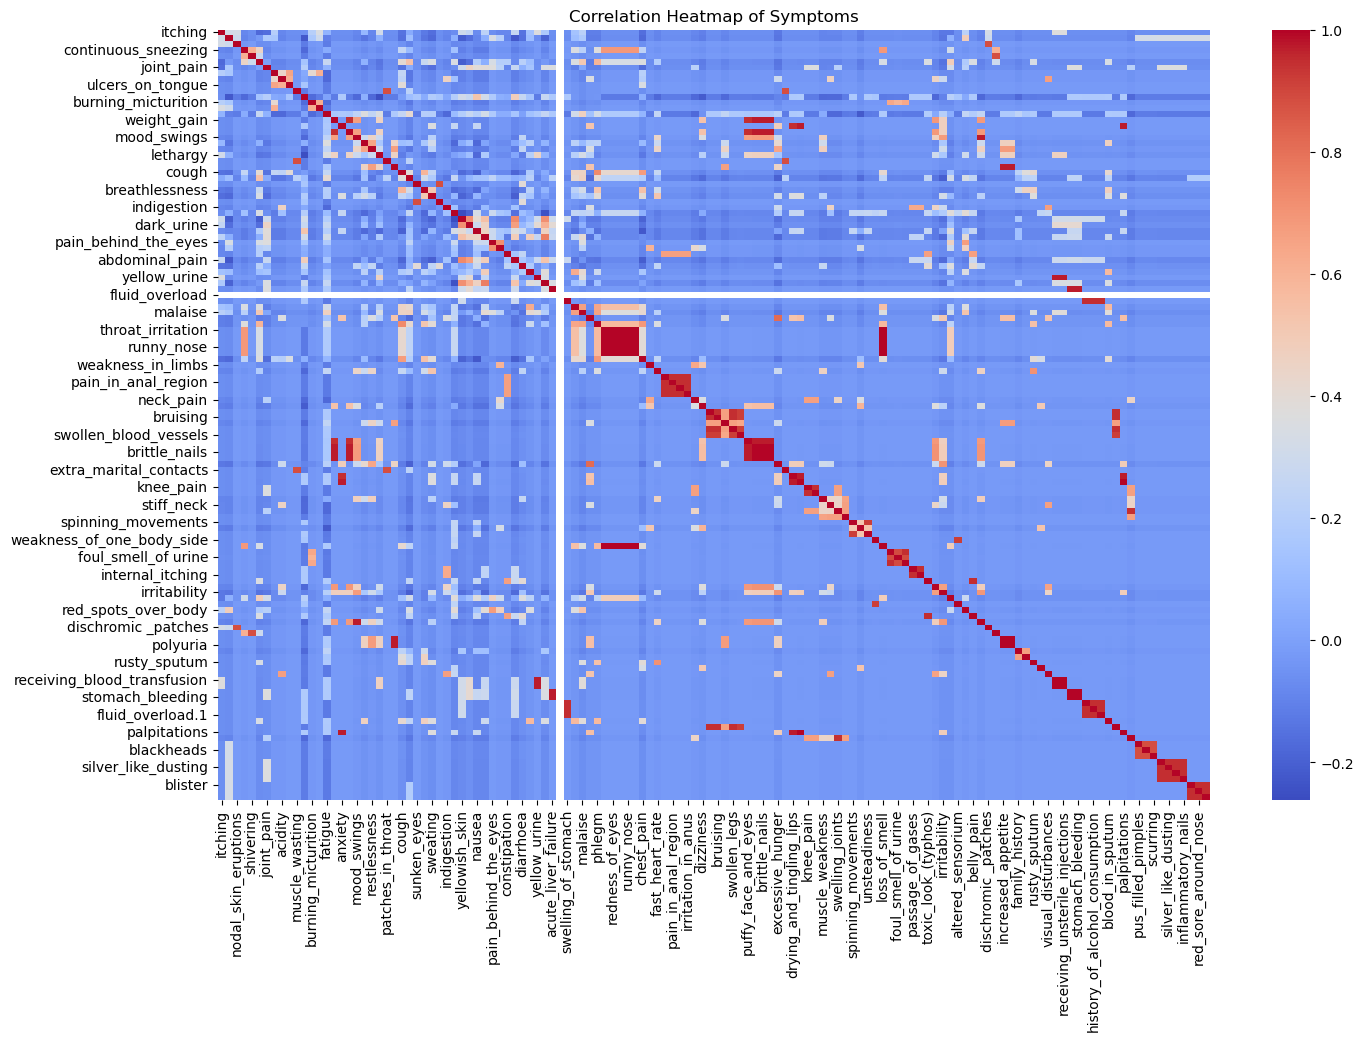

In [40]:
plt.figure(figsize=(16, 10))
sns.heatmap(disease_df.drop(columns=disease_df.columns[-1]).corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Symptoms')
plt.show()

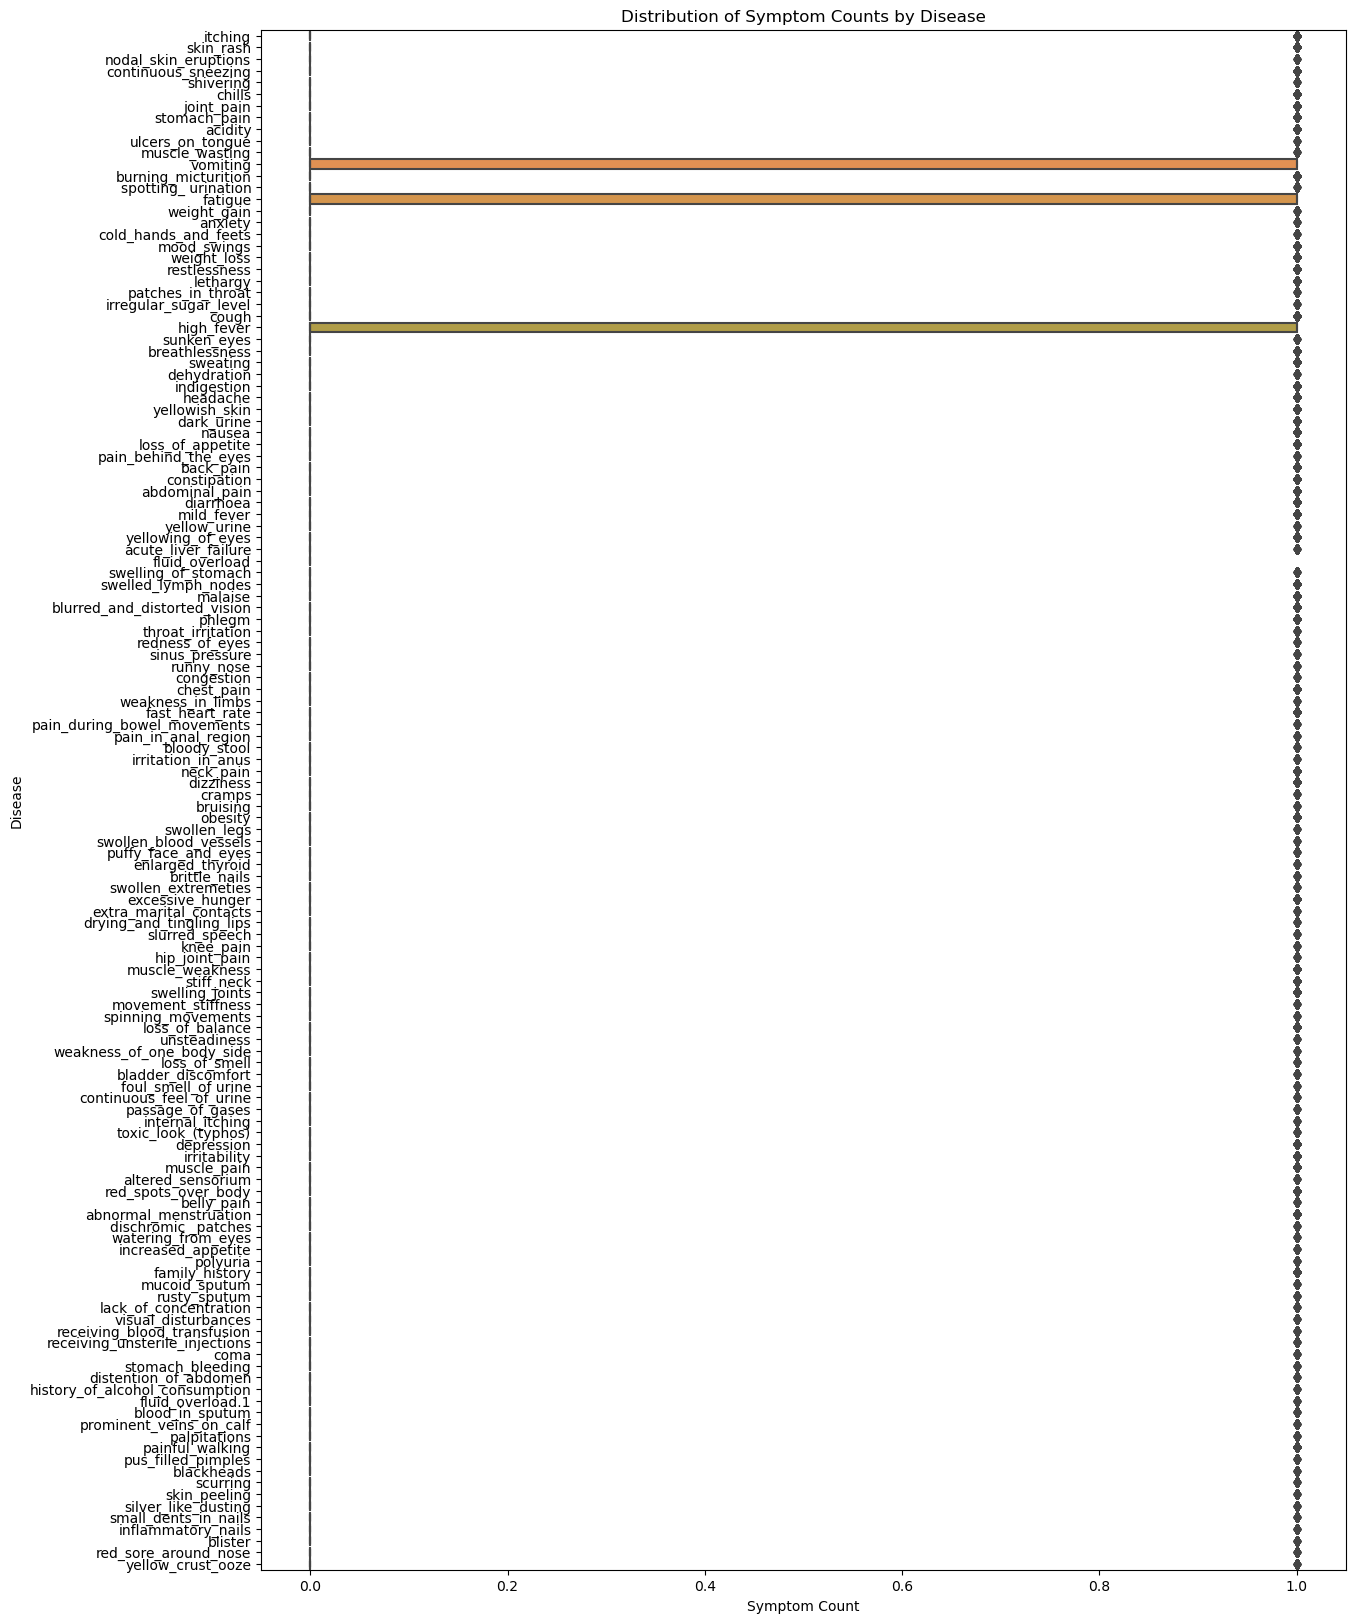

In [41]:
plt.figure(figsize=(14, 20))
sns.boxplot(data=disease_df.iloc[:, :-1], orient='h')
plt.title('Distribution of Symptom Counts by Disease')
plt.xlabel('Symptom Count')
plt.ylabel('Disease')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [84]:
#final_df = pd.concat([disease_df, testing_df], axis = 0)

In [85]:
#x = final_df.drop(columns=['prognosis'])
#y = final_df['prognosis']

In [86]:
#final_train, final_test = train_test_split(final_df, train_size = 0.8, random_state = 5)

In [87]:
x_train = disease_df.drop(columns = ["prognosis"])
y_train = disease_df["prognosis"]

In [88]:
x_test = testing_df.drop(columns = ["prognosis"])
y_test = testing_df["prognosis"]

In [89]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=37)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=37)

In [91]:
y_pred = rf_classifier.predict(x_test)

In [92]:
print(rf_classifier.score(x_test, y_test))

0.9761904761904762


In [93]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9761904761904762
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00     

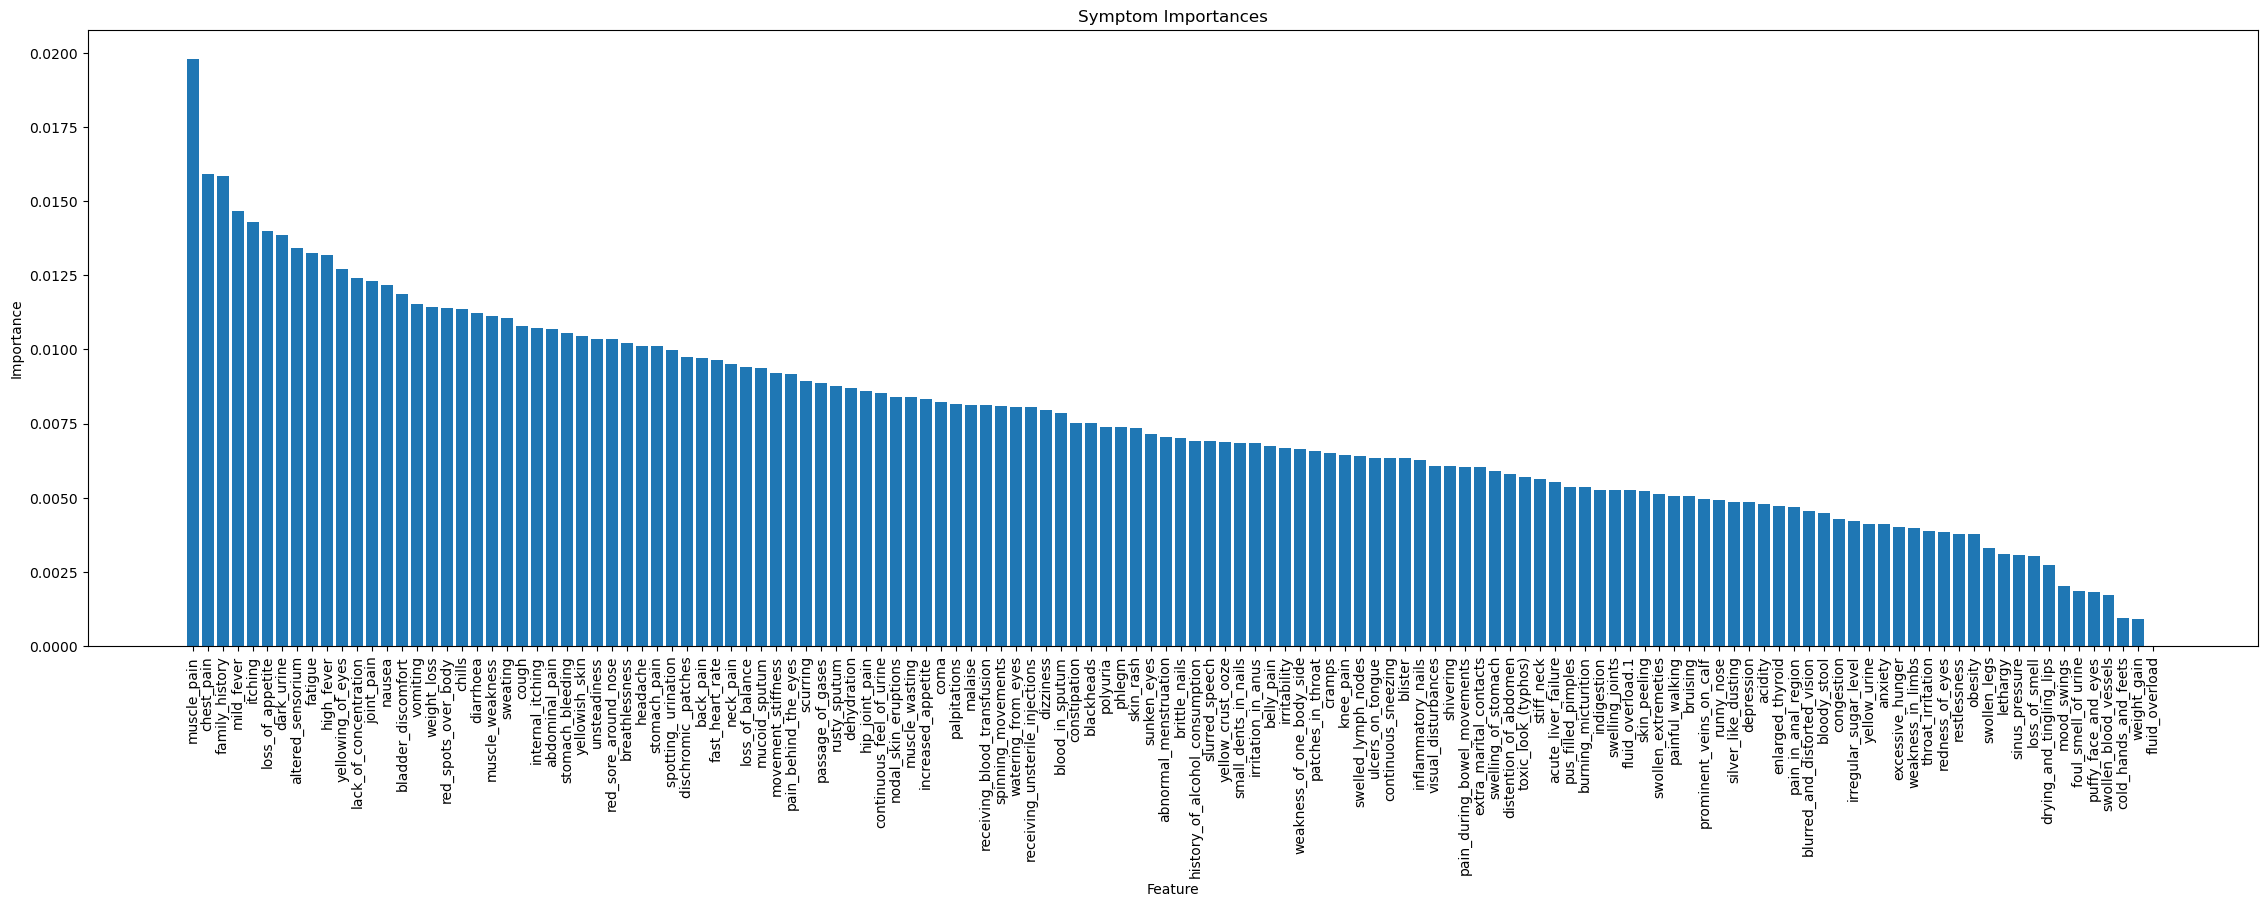

In [94]:
disease_importance = rf_classifier.feature_importances_

# Sort feature importances in descending order
symptoms = np.argsort(disease_importance)[::-1]

# Plot feature importances
plt.figure(figsize=(28, 8))
plt.title("Symptom Importances")
plt.bar(range(X.shape[1]), disease_importance[symptoms], align="center")
plt.xticks(range(X.shape[1]), X.columns[symptoms], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [157]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
import numpy as np

In [158]:
cvs = cross_validate(clf, X, y, cv = 10, return_estimator=True)

In [159]:
score = cvs['test_score'].mean()
score

1.0

In [160]:
sym = []
classification_reports = []
for i in cvs['estimator']:
 sym.append(list(i.feature_importances_))



sym_avg = np.mean(sym, axis = 0)

/var/folders/yr/0xnt5_b113v0y_xx4z5418nr0000gn/T/ipykernel_4616/3023145750.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  b_plot.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


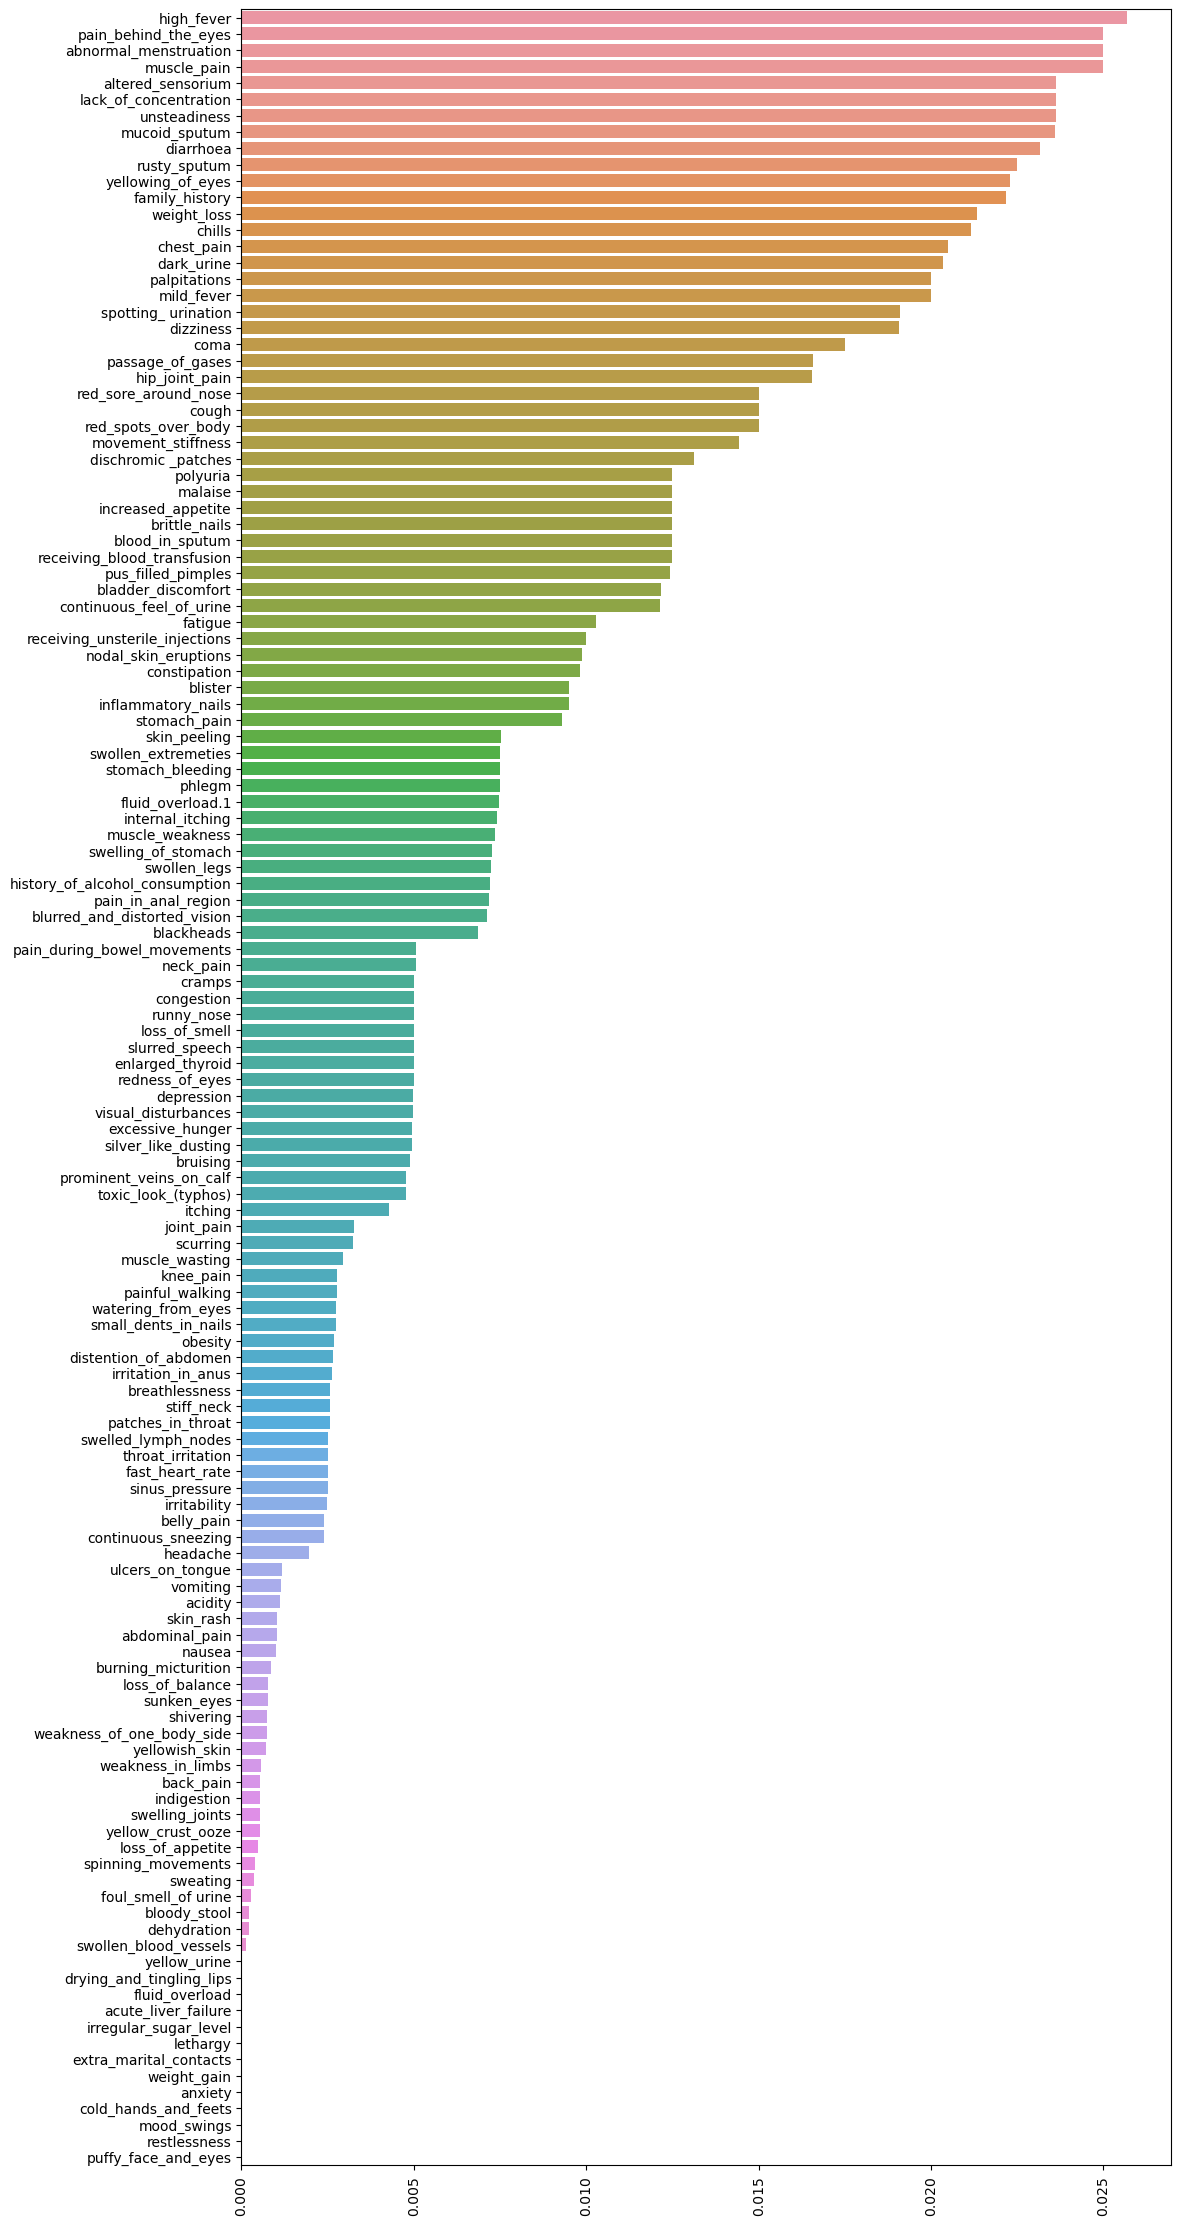

In [163]:
symp_avg = pd.Series(symp_avg, index = X.columns).sort_values(ascending=False)
#create plot
plt.figure(figsize=(12, 28))
b_plot = sns.barplot(x=symp_avg, y=symp_avg.index)
b_plot.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.show()